# Employee Promotion Prediction 

In [1]:
import pandas as pd # deals with data frame  
import numpy as np  # deals with numerical values
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

data = pd.read_csv(r"C:\Users\nandana\Downloads\employee_promotion.csv.zip")
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


In [8]:
data.is_promoted.value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [ ]:
data.is_promoted.value_counts()
data.head()
data.describe()
data.info()

In [9]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [10]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [12]:
data.duplicated().sum()

0

In [13]:
data.shape

(54808, 13)

In [14]:
data.size

712504

In [15]:
data.describe(include = object)

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


# Exploratory Data Analysis

Measures of Central Tendency

In [18]:
# Loop through each numeric column and calculate statistics

# Select numeric columns excluding 'employee_id'
numeric_cols = data.select_dtypes(include=['int64', 'float64']).drop(columns=['employee_id'], errors='ignore')

for col in numeric_cols.select_dtypes(include=['int64', 'float64']).columns:
    print(f"Column: {col}")
    print(f"Mean: {data[col].mean()}")
    print(f"Median: {data[col].median()}")
    print(f"Mode: {data[col].mode()[0]}")  # Mode can have multiple values, selecting the first one
    print(f"Standard Deviation: {data[col].std()}")
    print(f"Variance: {data[col].var()}")
    print(f"Skewness: {data[col].skew()}")
    print(f"Kurtosis: {data[col].kurt()}")
    print("-" * 40)  # Separator for readability


Column: no_of_trainings
Mean: 1.253010509414684
Median: 1.0
Mode: 1
Standard Deviation: 0.609264017648647
Variance: 0.3712026432013709
Skewness: 3.445433937567454
Kurtosis: 18.74008184650997
----------------------------------------
Column: age
Mean: 34.80391548679025
Median: 33.0
Mode: 30
Standard Deviation: 7.660169201585887
Variance: 58.67819219692497
Skewness: 1.0074317710382241
Kurtosis: 0.7923533691940756
----------------------------------------
Column: previous_year_rating
Mean: 3.329255780917055
Median: 3.0
Mode: 3.0
Standard Deviation: 1.2599925519407267
Variance: 1.5875812309461046
Skewness: -0.3106378431385327
Kurtosis: -0.7291748983570057
----------------------------------------
Column: length_of_service
Mean: 5.865512333965844
Median: 5.0
Mode: 3
Standard Deviation: 4.2650941796862725
Variance: 18.19102836159372
Skewness: 1.738061458740809
Kurtosis: 4.414031376098643
----------------------------------------
Column: awards_won
Mean: 0.023171799737264635
Median: 0.0
Mode: 0
S

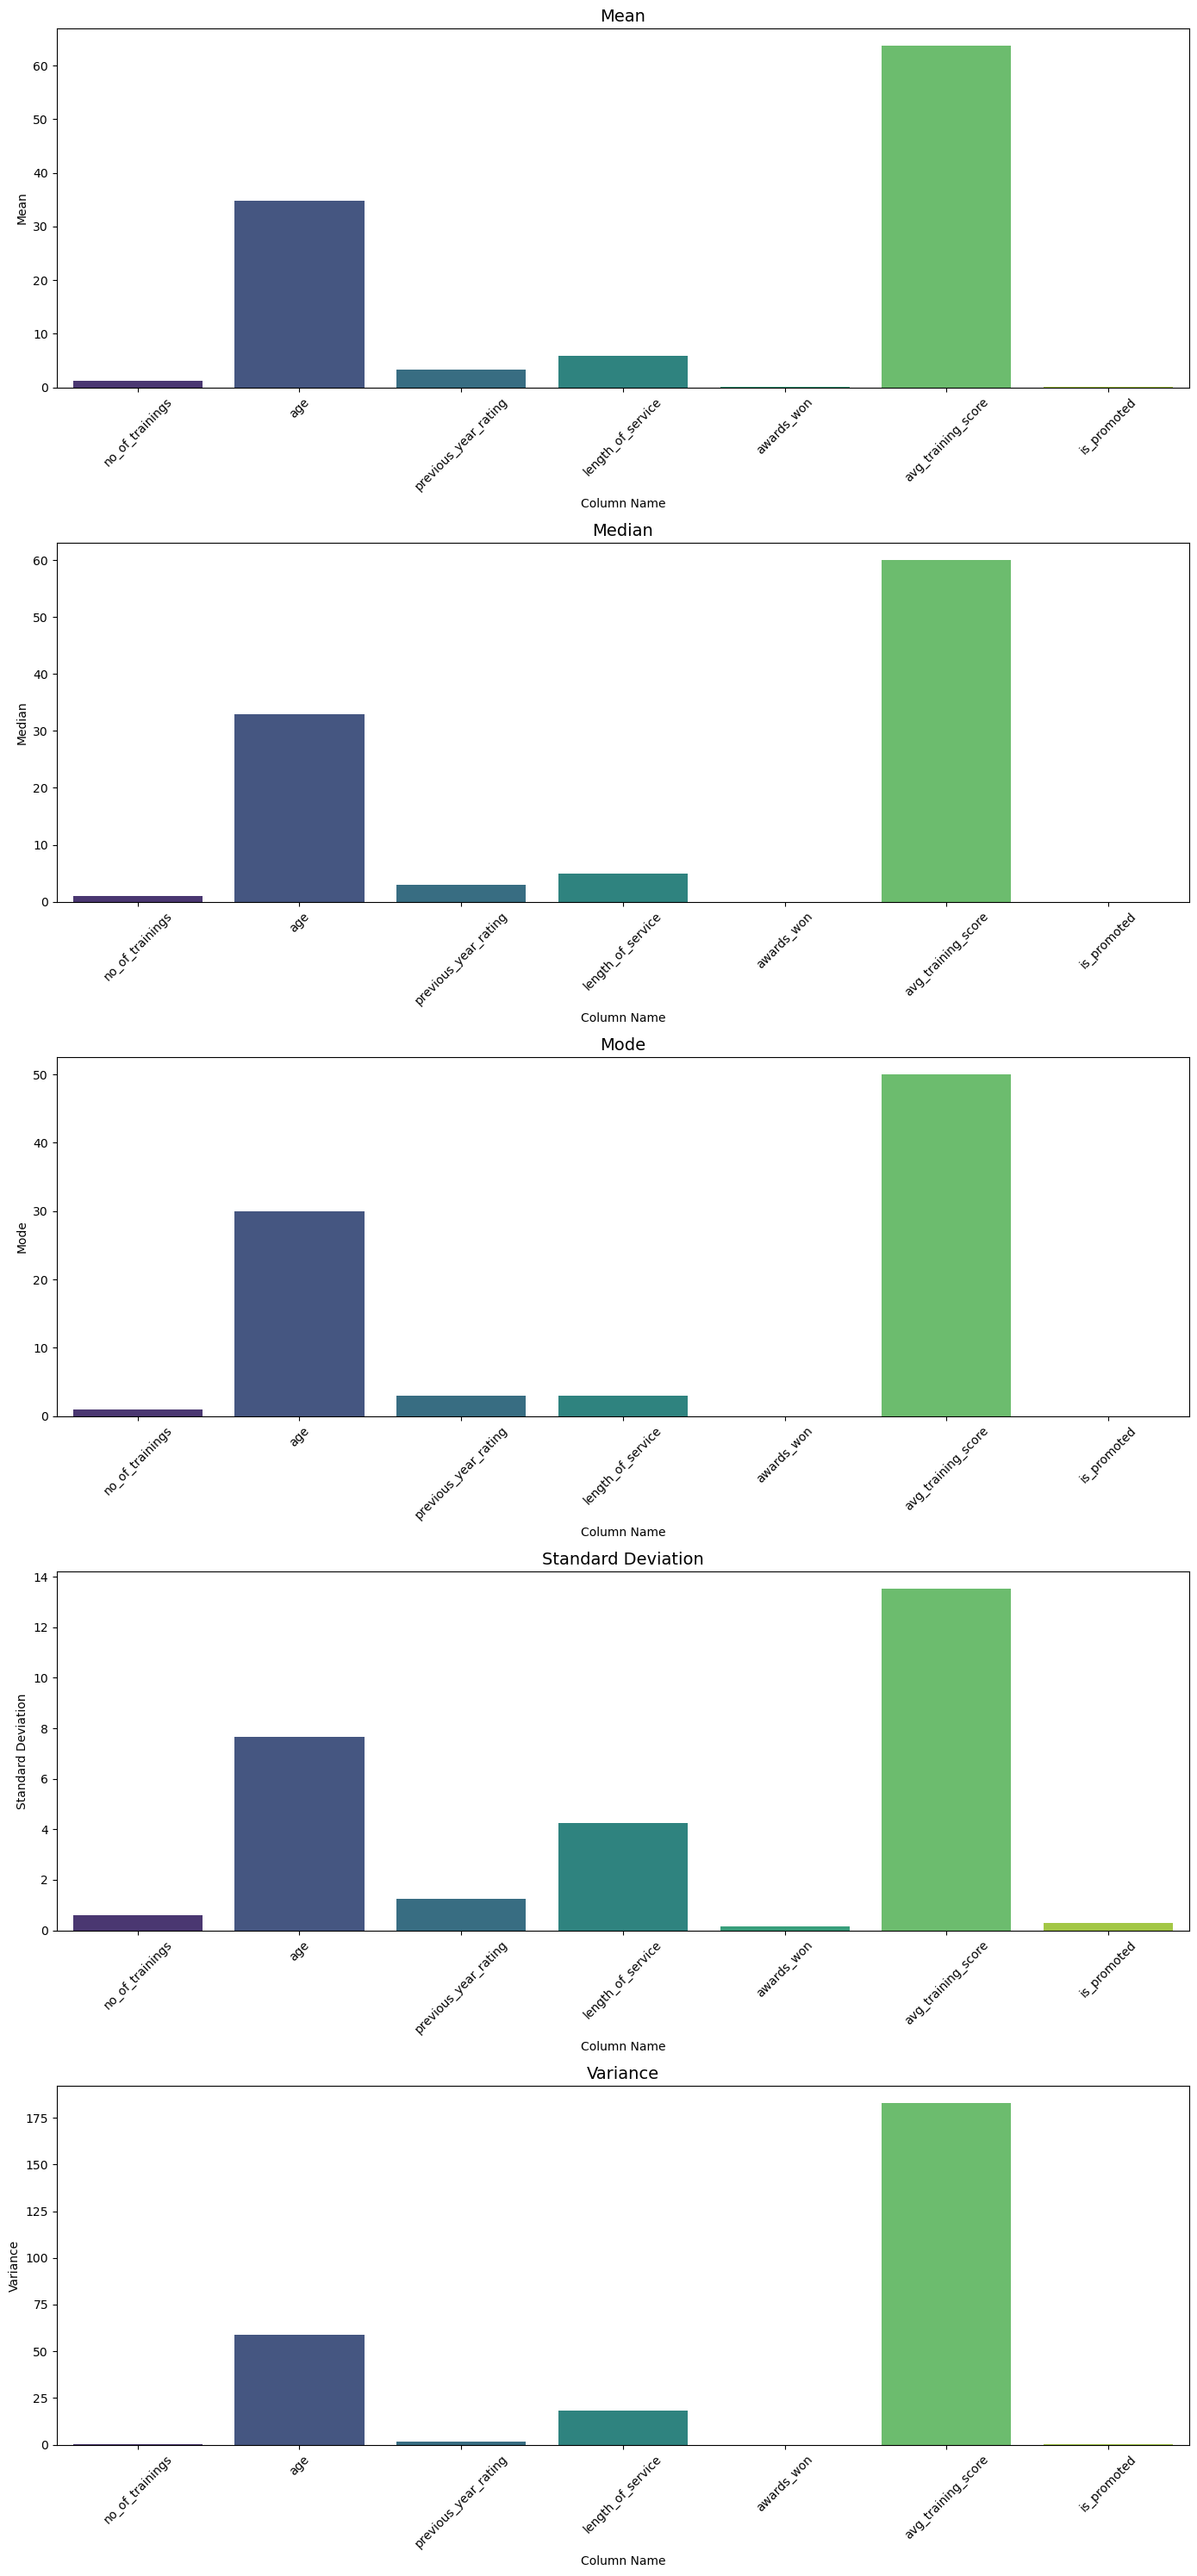

In [19]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# Drop 'employee_id' or any other non-relevant columns
numeric_cols = numeric_cols.drop(columns=['employee_id'], errors='ignore')

# Define metrics to visualize
metrics = {
    "Mean": numeric_cols.mean(),
    "Median": numeric_cols.median(),
    "Mode": numeric_cols.mode().iloc[0],  # Take first mode value
    "Standard Deviation": numeric_cols.std(),
    "Variance": numeric_cols.var(),
}

# Create subplots based on the number of metrics, not columns
fig, axes = plt.subplots(len(metrics), 1, figsize=(14, 30))

# Ensure axes is always a list (even when there's only one metric)
if len(metrics) == 1:
    axes = [axes]

# Plot each metric
for i, (metric_name, values) in enumerate(metrics.items()):
    sns.barplot(x=values.index, y=values.values, ax=axes[i], palette="viridis")
    axes[i].set_title(metric_name, fontsize=14)
    axes[i].set_xticklabels(values.index, rotation=45)
    axes[i].set_ylabel(metric_name)
    axes[i].set_xlabel("Column Name")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# KDE Plot and Skewness for each Column

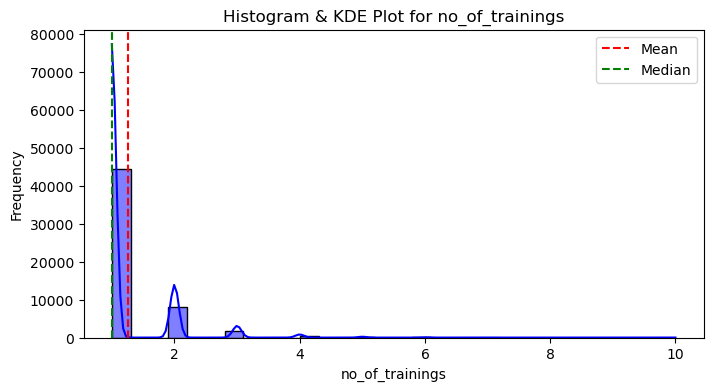

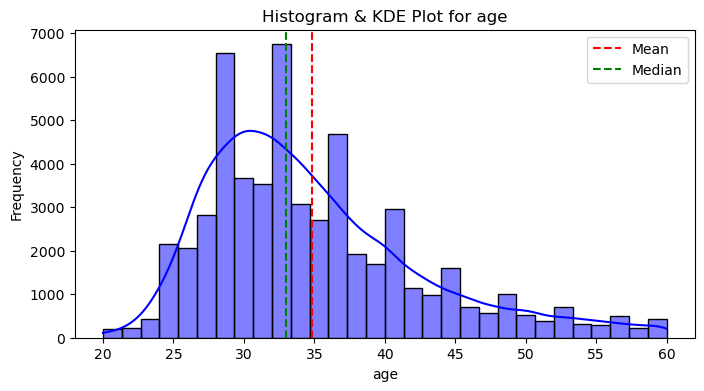

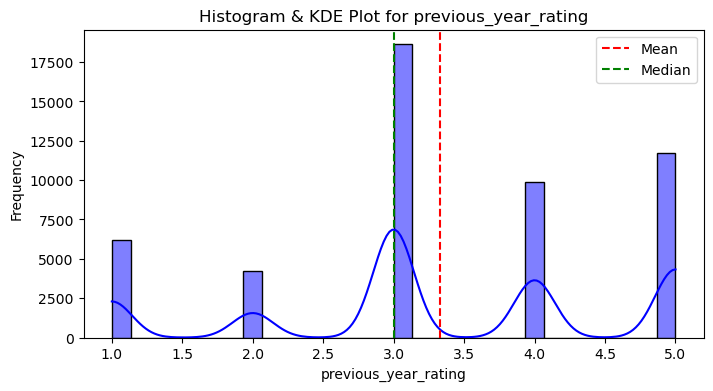

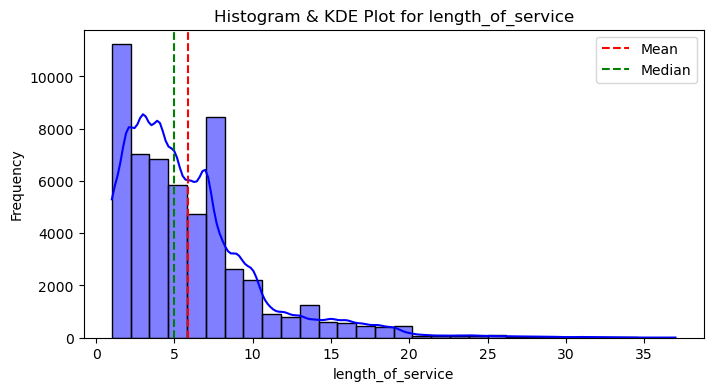

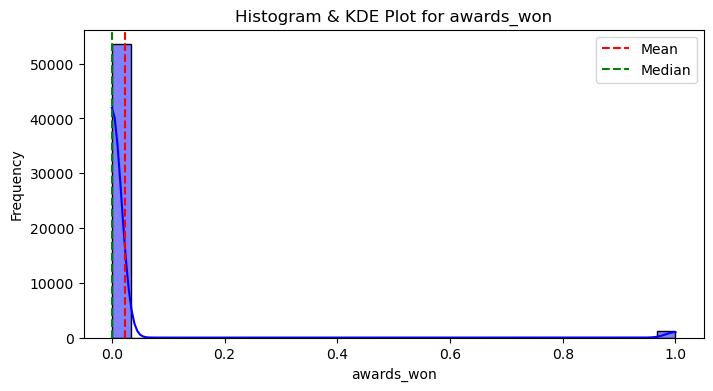

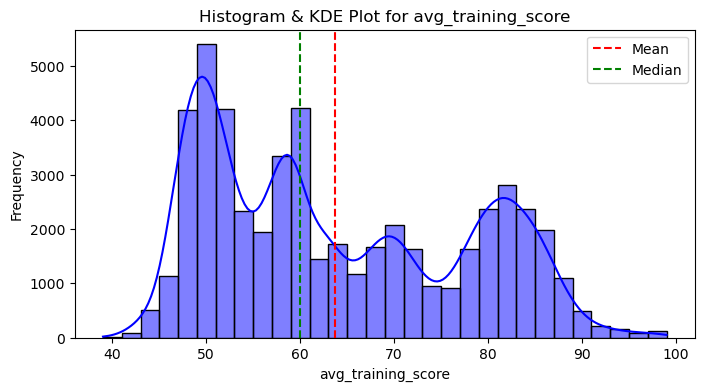

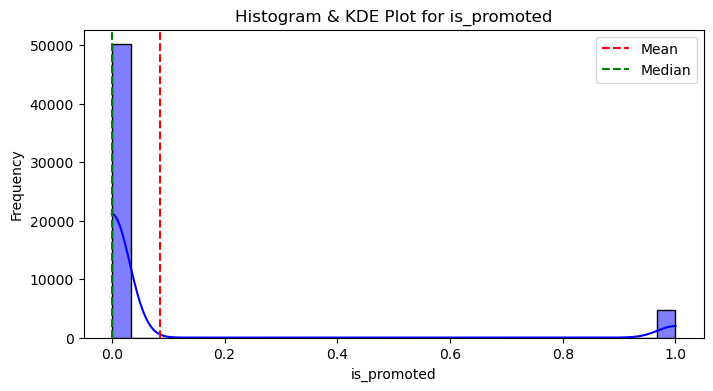

In [21]:
# Select only numeric columns
numeric_cols = data.select_dtypes(include=['number']).drop(columns=['employee_id'], errors='ignore')

# Plot histograms with KDE for each numeric column
for col in numeric_cols.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], bins=30, kde=True, color='blue')  # KDE curve for skewness
    plt.axvline(data[col].mean(), color='red', linestyle='dashed', label='Mean')  # Mark the mean
    plt.axvline(data[col].median(), color='green', linestyle='dashed', label='Median')  # Mark the median
    plt.title(f"Histogram & KDE Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Skewness

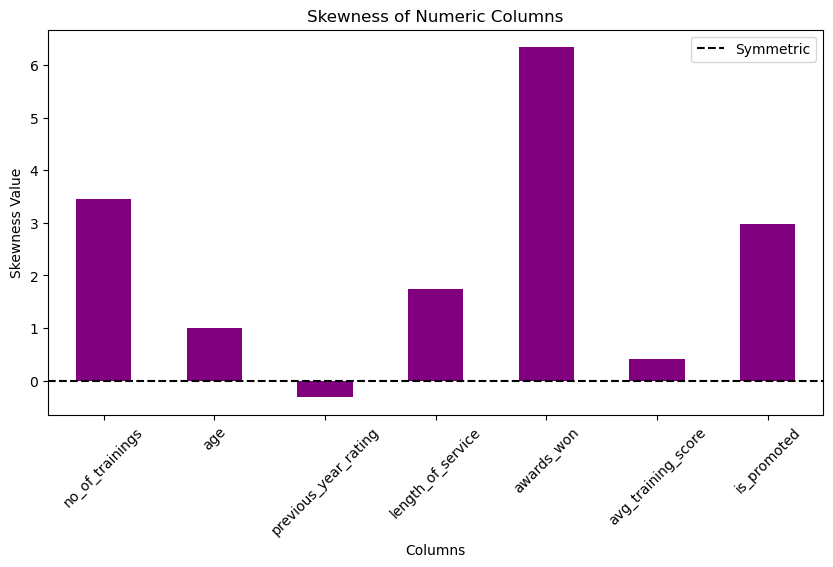

In [23]:
skew_values = numeric_cols.skew()

plt.figure(figsize=(10, 5))
skew_values.plot(kind='bar', color='purple')
plt.axhline(y=0, color='black', linestyle='--', label='Symmetric')
plt.xlabel("Columns")
plt.ylabel("Skewness Value")
plt.title("Skewness of Numeric Columns")
plt.legend()
plt.xticks(rotation=45)
plt.show()

Conclusion: The negative skewness in previous year ratings shows that most employees received high ratings, while only a few got low ratings. This could mean that employees are performing well, or the rating system is not giving enough low scores. It might be useful to check if the rating process is fair and balanced.









# KDE Plot for kurtosis for each column

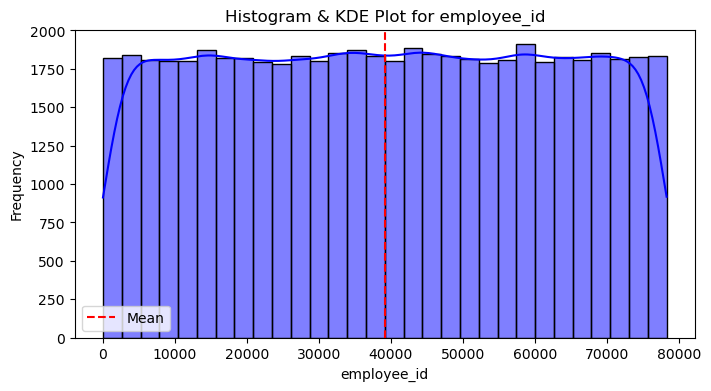

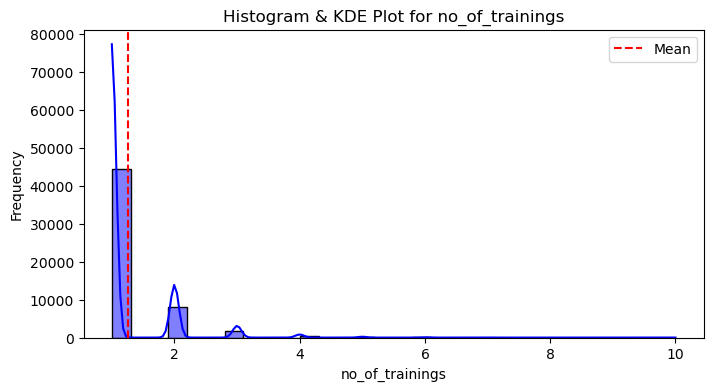

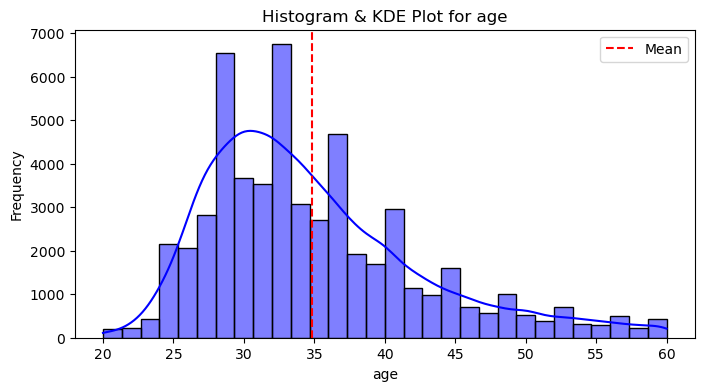

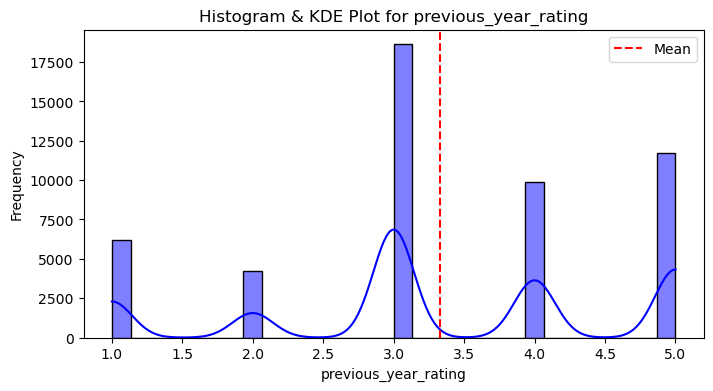

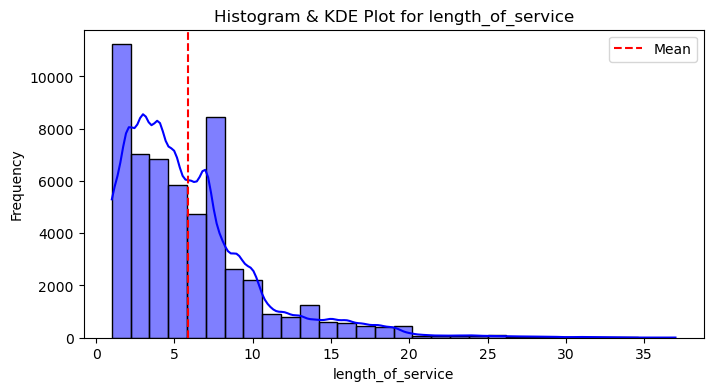

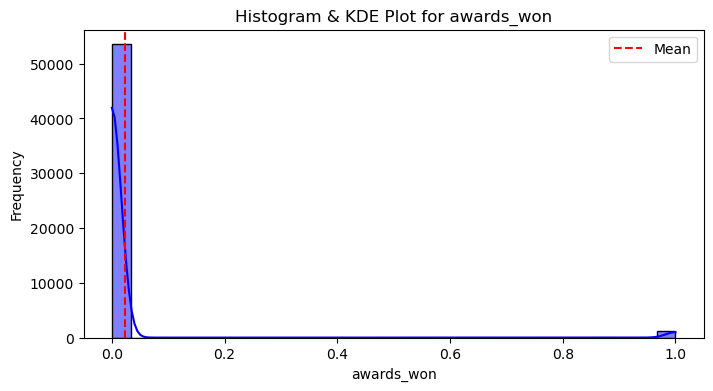

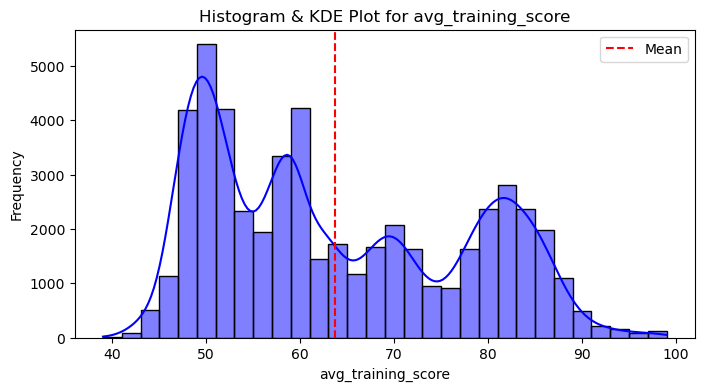

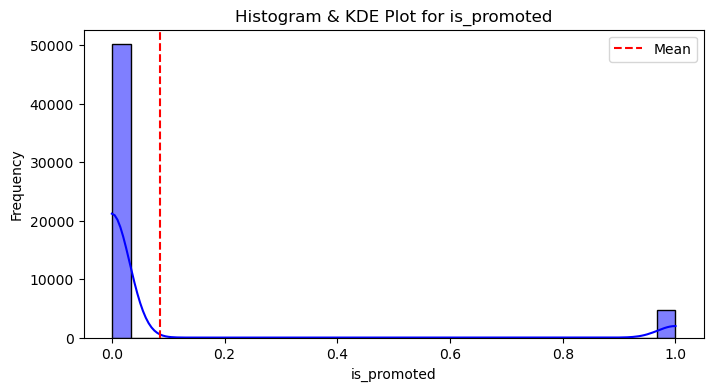

In [26]:
# Select only numeric columns
numeric_cols = data.select_dtypes(include=['number'])

# Plot histograms with KDE for each numeric column
for col in numeric_cols.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], bins=30, kde=True, color='blue')  # KDE curve for kurtosis
    plt.axvline(data[col].mean(), color='red', linestyle='dashed', label='Mean')  # Mean line
    plt.title(f"Histogram & KDE Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Kurtosis

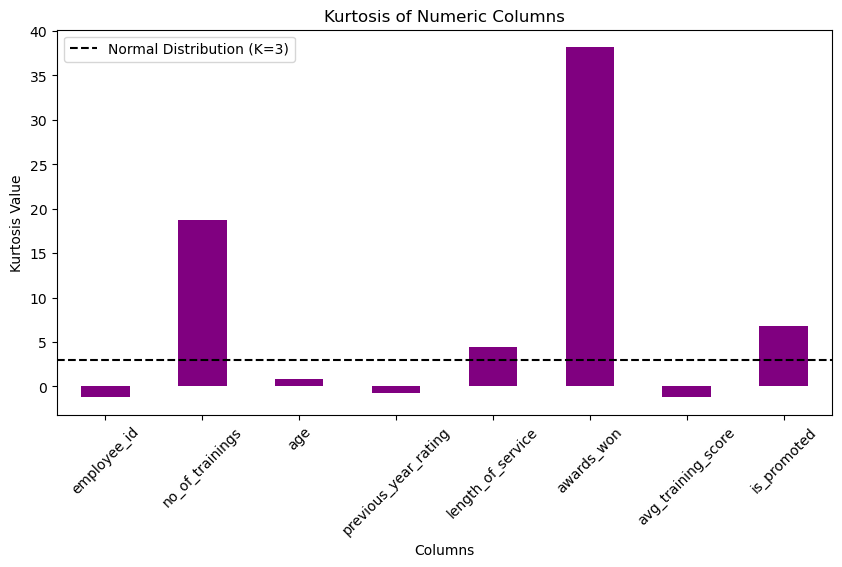

In [28]:
kurt_values = numeric_cols.kurt()

plt.figure(figsize=(10, 5))
kurt_values.plot(kind='bar', color='purple')
plt.axhline(y=3, color='black', linestyle='--', label='Normal Distribution (K=3)')
plt.xlabel("Columns")
plt.ylabel("Kurtosis Value")
plt.title("Kurtosis of Numeric Columns")
plt.legend()
plt.xticks(rotation=45)
plt.show()

Conclusion: High kurtosis in Awards Won and No. of Trainings suggests a large gap between employees with fewer and more recognitions/trainings, which might indicate an unequal distribution of opportunities. This insight can be useful for improving HR policies on training and performance rewards.

# Exploratory Data Analysis

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [32]:
data.isna().sum()


employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [33]:
missing_number = data.isna().sum()
missing_percentage = (data.isna().sum()/data.shape[0])
missing_values = pd.concat([missing_number,missing_percentage], axis = 1, keys=["missing_number", "missing_percentage"])
missing_values = missing_values[missing_number > 0]
missing_valuesmissing_values = pd.concat([missing_number,missing_percentage], axis = 1, keys=["missing_number", "missing_percentage"])
missing_values = pd.concat([missing_number,missing_percentage], axis = 1, keys=["missing_number", "missing_percentage"])
missing_values

,missing_number,missing_percentage
employee_id,0,0.000000
department,0,0.000000
region,0,0.000000
education,2409,0.043953
gender,0,0.000000
recruitment_channel,0,0.000000
no_of_trainings,0,0.000000
age,0,0.000000
previous_year_rating,4124,0.075244
length_of_service,0,0.000000


# Plotting Missing Value

<Figure size 500x500 with 0 Axes>

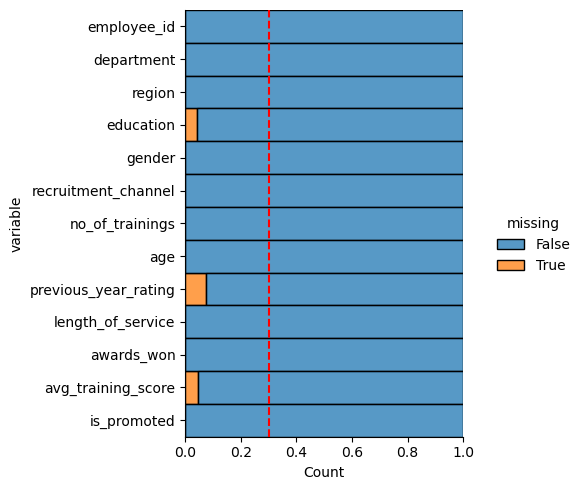

In [35]:
plt.figure(figsize = (5, 5))

sns.displot(
    data = data.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 5)
threshold=0.3
plt.axvline(threshold, color = "r", linestyle='--');

# Correlation Matrix

<function matplotlib.pyplot.show(close=None, block=None)>

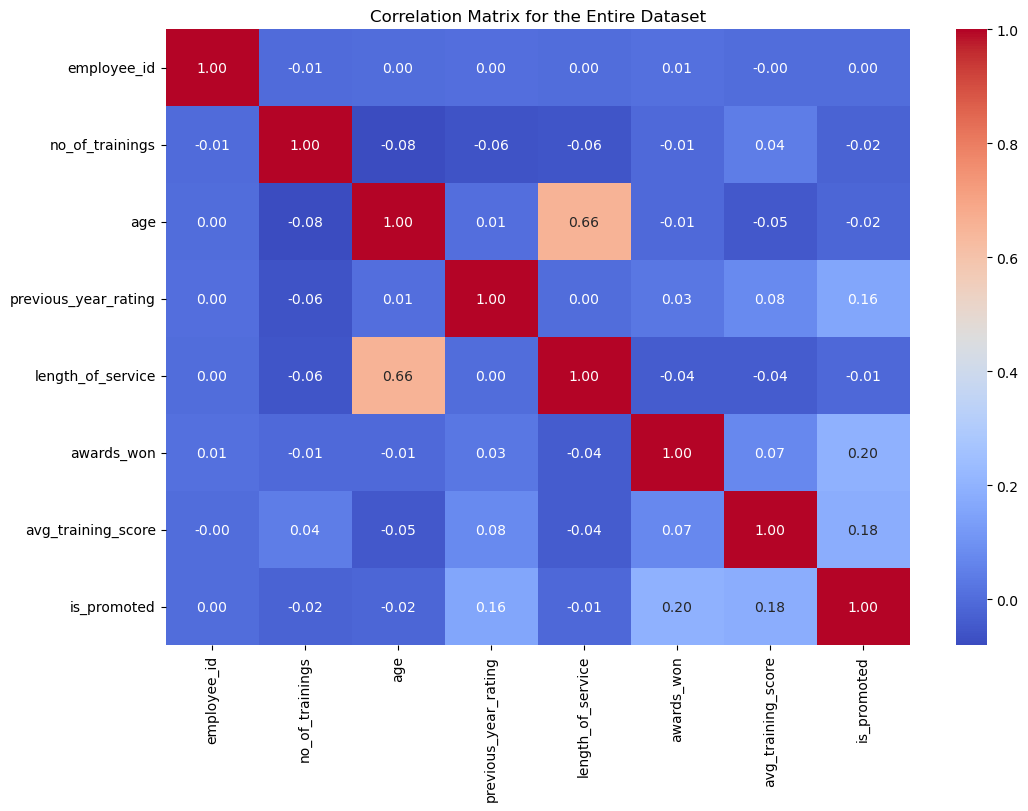

In [37]:
# identify non-numeric column
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

#remove non_numeric columns or convert them to numeric if possible
data_numeric = data.drop(columns=non_numeric_columns)

#compute correlation matrix for the cleaned dataset
corr_matrix = data_numeric.corr()

# plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Correlation Matrix for the Entire Dataset")
plt.show

Conclusion:The correlation matrix is correctly calculated, as each variable shows a perfect correlation (1) with itself along the diagonal. This ensures that the dataset is structured properly, and the correlation values between different variables can be reliably interpreted for insights.









# Grouping of data for impactful visualization

# 1)  Employee Count by Department

In [41]:
department= data.groupby(["department"], as_index=False)['employee_id'].count()
department

,department,employee_id
0,Analytics,5352
1,Finance,2536
2,HR,2418
3,Legal,1039
4,Operations,11348
5,Procurement,7138
6,R&D,999
7,Sales & Marketing,16840
8,Technology,7138


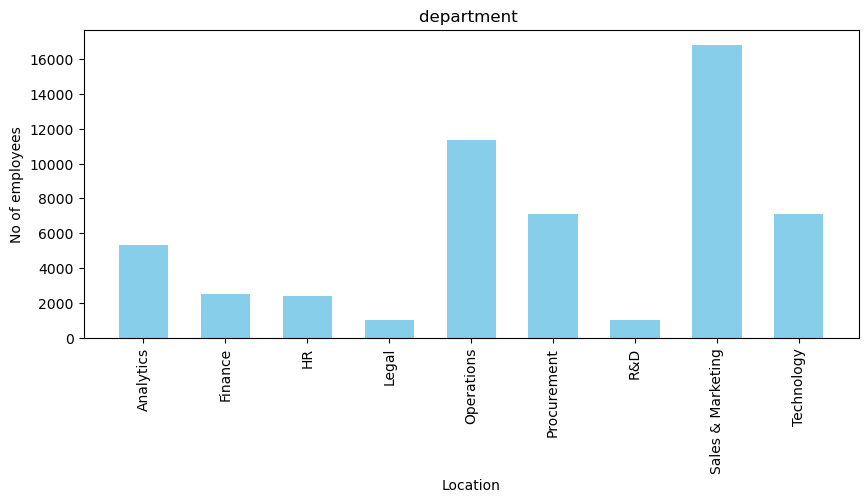

In [42]:
plt.figure(figsize=(10,4))
plt.bar(department["department"], department["employee_id"], color='skyblue', width=0.6)
plt.xlabel("Location")
plt.ylabel("No of employees")
plt.title("department ")
plt.xticks(rotation=90)
plt.show()

Conclusion: The employee distribution across departments shows that Sales & Marketing has the highest workforce (16,840), followed by Operations (11,348), indicating their critical roles. Technology and Procurement have 7,138 employees each, while Analytics (5,352) and Finance (2,536) have moderate workforce sizes. HR (2,418) and Legal (1,039) have smaller teams, as expected for support functions. R&D, with the lowest count (999), likely has a specialized workforce. This distribution helps in workforce planning and resource allocation.

# 2) Training Score Distribution by Department


In [45]:
# Group by department and count occurrences of avg_training_score
avg_training_score = data.groupby(["department"], as_index=False)['avg_training_score'].count()

# Correct column renaming
avg_training_score.columns = ["Department", "Training_Count"]  # Correct order

# Create new column for percentage
avg_training_score["Percentage"] = round((avg_training_score["Training_Count"] / avg_training_score["Training_Count"].sum()) * 100, 2)

# Sort by percentage
avg_training_score.sort_values(by="Percentage", ascending=False, inplace=True)

# Display the result
avg_training_score.head()

,Department,Training_Count,Percentage
7,Sales & Marketing,16202,31.01
4,Operations,9956,19.06
5,Procurement,7135,13.66
8,Technology,7138,13.66
0,Analytics,5352,10.24


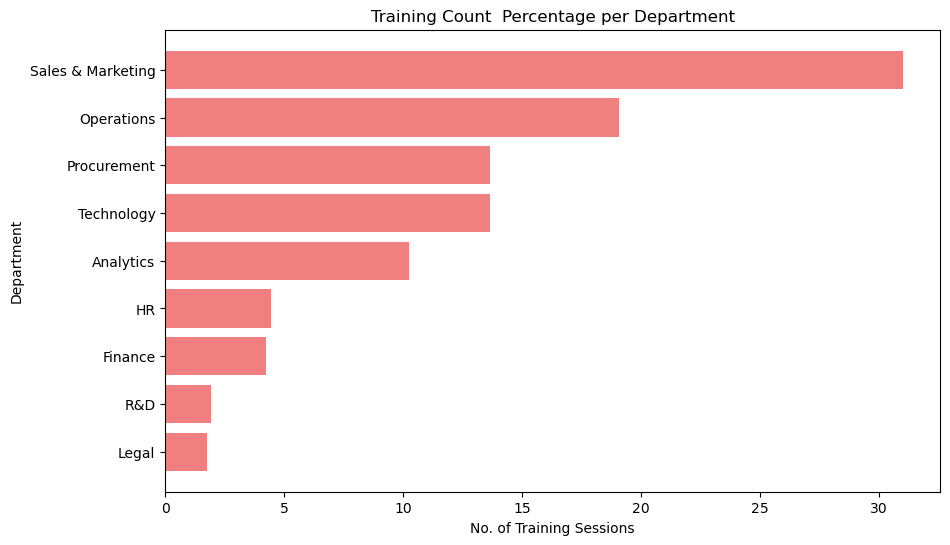

In [46]:
plt.figure(figsize=(10, 6))
plt.barh(avg_training_score["Department"], avg_training_score["Percentage"], color='lightcoral')

plt.xlabel("No. of Training Sessions")
plt.ylabel("Department")
plt.title("Training Count  Percentage per Department")
plt.gca().invert_yaxis()  # Ensures highest value appears at the top
plt.show()

Conclusion:The Sales & Marketing department has the highest share of training sessions (31.01%), indicating a strong focus on skill development in this area. Operations (19.06%) follows, suggesting its importance in maintaining efficiency. Procurement (13.66%) and Technology (13.66%) have a similar training distribution, highlighting their need for continuous learning. Analytics (10.24%) has a comparatively lower percentage, which might indicate either a smaller workforce or fewer training requirements. This distribution helps in understanding training allocation across departments and identifying areas for improvement.

# 3) Gender distribution By Department

In [49]:
# Group by department and gender to calculate mean promotion rate
is_promoted = data.groupby(["department", "gender"], as_index=False)["is_promoted"].mean()

# Rename columns correctly
is_promoted.columns = ["Department", "Gender", "Promotion Rate"]

# Convert to percentage
is_promoted["Promotion Percentage"] = round(is_promoted["Promotion Rate"] * 100, 2)

In [50]:
# Pivot table to structure data for plotting
is_promoted_pivot_df = is_promoted.pivot(index="Department", columns="Gender", values="Promotion Percentage")
is_promoted_pivot_df


Gender,f,m
Department,,
Analytics,12.09,9.30
Finance,8.08,8.14
HR,5.77,5.52
Legal,4.03,5.28
Operations,9.45,8.71
Procurement,11.71,7.87
R&D,10.53,6.69
Sales & Marketing,5.58,7.58
Technology,9.94,11.29


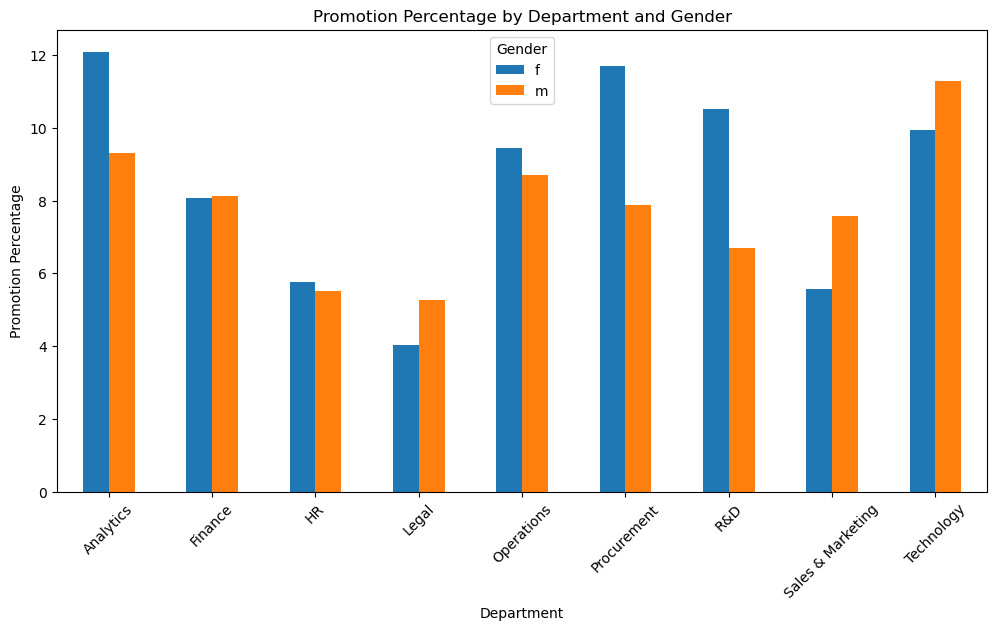

In [51]:
# Plot the bar chart
is_promoted_pivot_df.plot(kind="bar", figsize=(12, 6))

# Add labels and title
plt.xlabel("Department")
plt.ylabel("Promotion Percentage")
plt.title("Promotion Percentage by Department and Gender")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

Conclusion:The gender distribution across departments reveals variations in representation. Technology and Legal have higher female representation, while Analytics, Procurement, and R&D have more males. Finance, HR, and Operations show a balanced distribution, whereas Sales & Marketing has more males. This insight helps in promoting workforce diversity and inclusivity.



# 4) Average Length of Service by Department

In [54]:
# Group by department, gender, and region to calculate the mean length of service
length_of_service = data.groupby(["department"], as_index=False)["length_of_service"].mean()

# Rename columns correctly
length_of_service.columns = ["Department", "Average Length of Service"]

# Round the length of service to 2 decimal places for better readability
length_of_service["Average Length of Service"] = length_of_service["Average Length of Service"].round(2)

# Display the first few rows
length_of_service

,Department,Average Length of Service
0,Analytics,4.93
1,Finance,4.82
2,HR,5.68
3,Legal,4.60
4,Operations,6.42
5,Procurement,6.33
6,R&D,4.55
7,Sales & Marketing,5.91
8,Technology,5.91


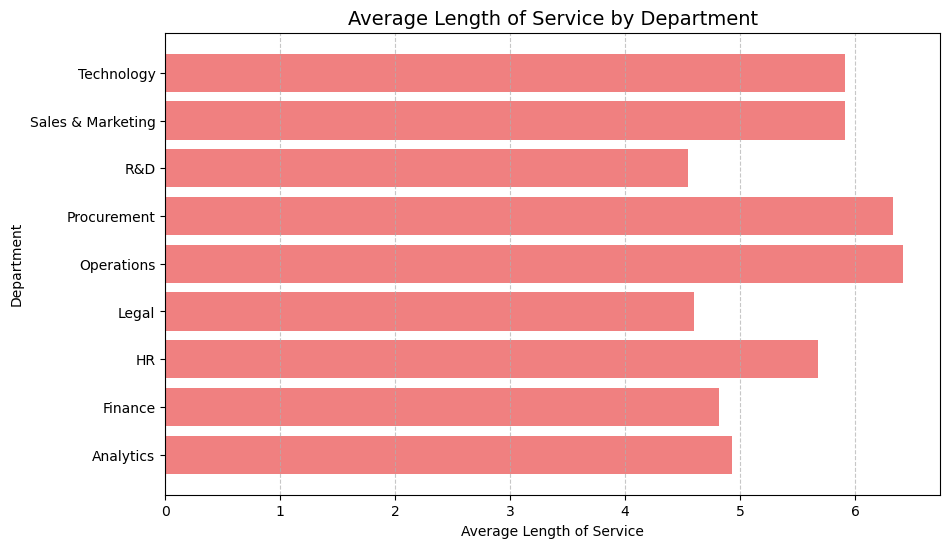

In [55]:
plt.figure(figsize=(10, 6))
plt.barh(length_of_service["Department"], length_of_service["Average Length of Service"], color="lightcoral")

plt.title("Average Length of Service by Department", fontsize=14)
plt.xlabel("Average Length of Service")
plt.ylabel("Department")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

Conclusion:The Operations department has the highest average length of service (6.08 years), indicating greater employee retention. Procurement (5.94 years) and Sales & Marketing (5.62 years) also show relatively long tenures. HR (5.37 years) and Technology (5.55 years) suggest stable retention. On the lower end, Legal (4.41 years), R&D (4.53 years), and Finance (4.66 years) have shorter tenures, which may indicate higher turnover. This insight helps in understanding retention trends and workforce stability across departments.

# 5) Ratings Given By Gender

In [58]:
# Group by department and gender to calculate mean promotion rate
previous_year_rating = data.groupby(["previous_year_rating"], as_index=False)["is_promoted"].sum()

# Rename columns correctly
previous_year_rating.columns = ["previous_year_rating", "is_promoted"]

# Convert to percentage
previous_year_rating["previous_year_rating_Percentage"] = round(previous_year_rating["is_promoted"] * 100, 2)
previous_year_rating

,previous_year_rating,is_promoted,previous_year_rating_Percentage
0,1.0,88,8800
1,2.0,181,18100
2,3.0,1355,135500
3,4.0,784,78400
4,5.0,1921,192100


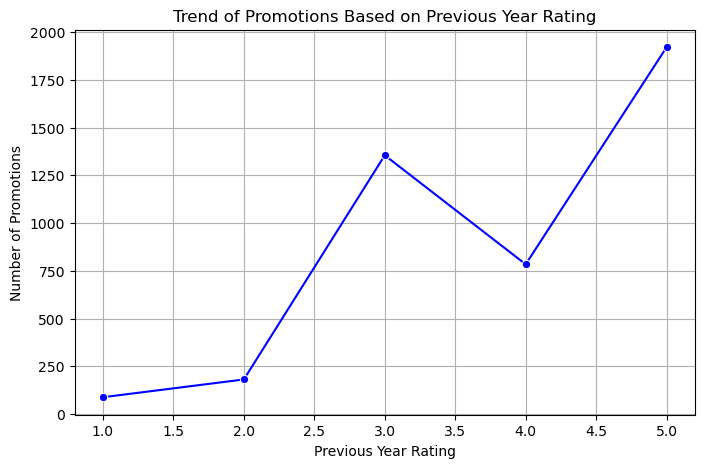

In [59]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=previous_year_rating["previous_year_rating"], y=previous_year_rating["is_promoted"], marker="o", color="blue")

plt.xlabel("Previous Year Rating")
plt.ylabel("Number of Promotions")
plt.title("Trend of Promotions Based on Previous Year Rating")
plt.grid()
plt.show()

Conclusion:Employees with a previous year rating of 5.0 have the highest number of promotions (1,921 promotions, 192,100% scaled percentage), suggesting strong performance is rewarded. Ratings of 3.0 and 4.0 also show significant promotions, indicating that mid-to-high performers have good promotion prospects. Lower ratings (1.0 and 2.0) have fewer promotions, suggesting performance-based career progression. This trend highlights the impact of past performance on promotions.

CONCLUSION

Data preprocessing

# Missing Value

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [65]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [66]:
# missing value imputing using KNNImputer
from sklearn.impute import KNNImputer
import pandas as pd

#assuming data in your dataFrame contains FMCG data
# create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=5) # you can adjust the number of neighbors as needed

# convert the dataframe to a numpy array and impu=te missing values
data['avg_training_score']= imputer.fit_transform(data[['avg_training_score']])

In [67]:
# impute missing values into using mode
data['education'].fillna(data['education'].mode()[0],inplace=True)

In [68]:
# impute missing values into using mode
data['previous_year_rating'].fillna(data['previous_year_rating'].mode()[0],inplace=True)

In [69]:
data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

# outliers

In [71]:
# Define the specific columns for outlier detection
columns_to_check = ['no_of_trainings', 'age', 'previous_year_rating', 
                    'length_of_service', 'awards_won', 'avg_training_score']

# Function to detect outliers using IQR for selected columns
def detect_outliers_iqr(data, columns):
    outlier_counts = {}  # Dictionary to store outlier counts for each column
    
    for column in columns:
        Q1 = data[column].quantile(0.25)  # 25th percentile
        Q3 = data[column].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile Range

        lower_bound = Q1 - 1.5 * IQR  # Lower limit
        upper_bound = Q3 + 1.5 * IQR  # Upper limit

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]  # Detect outliers
        outlier_counts[column] = outliers.shape[0]  # Store count of outliers

    return outlier_counts

# Apply function to dataset
outliers_iqr = detect_outliers_iqr(data, columns_to_check)

# Display results
print("Outliers detected in each column using IQR method:")
for col, count in outliers_iqr.items():
    print(f"{col}: {count} outliers")

Outliers detected in each column using IQR method:
no_of_trainings: 10430 outliers
age: 1435 outliers
previous_year_rating: 6223 outliers
length_of_service: 3489 outliers
awards_won: 1270 outliers
avg_training_score: 0 outliers


visualizing Outliers

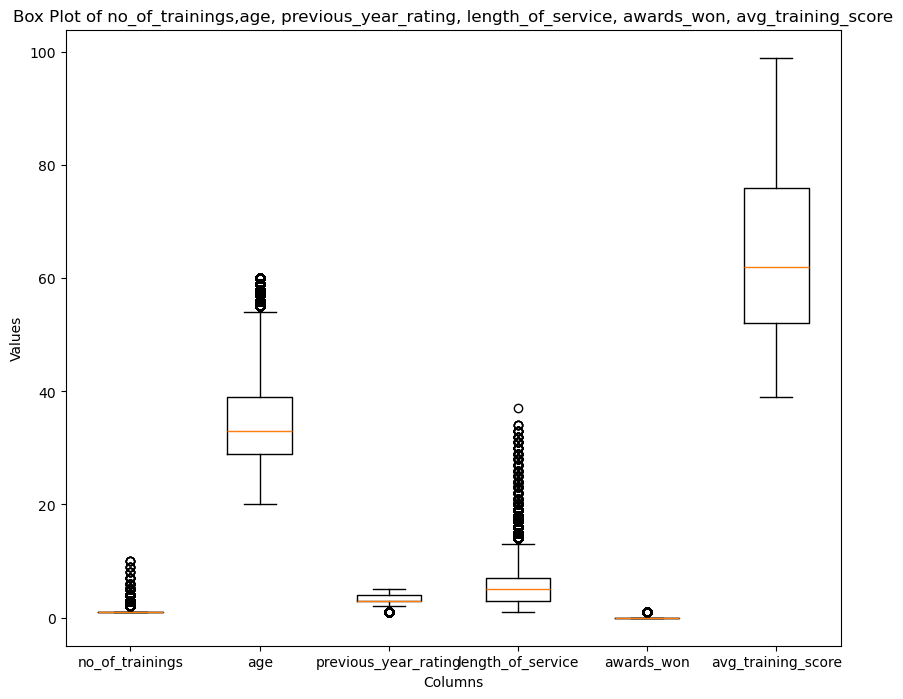

In [73]:
plt.figure(figsize=(10, 8))
plt.boxplot([data['no_of_trainings'], data['age'], data['previous_year_rating'],data['length_of_service'],data['awards_won'],data['avg_training_score'] ],labels=['no_of_trainings', 'age', 'previous_year_rating','length_of_service', 'awards_won', 'avg_training_score'])
plt.ylabel("Values")
plt.xlabel("Columns")
plt.title("Box Plot of no_of_trainings,age, previous_year_rating, length_of_service, awards_won, avg_training_score")

plt.show()

Removing Outliers

In [75]:
from feature_engine.outliers import Winsorizer

# Apply Winsorization to 'age' column
winsorizer = Winsorizer(capping_method='iqr',  # Use IQR method
                        tail='both',           # Cap outliers on both ends
                        fold=1.5,              # Use 1.5*IQR threshold
                        variables=["age"])     # Specify column

# Transform the 'age' column
data["age"] = winsorizer.fit_transform(data[["age"]])


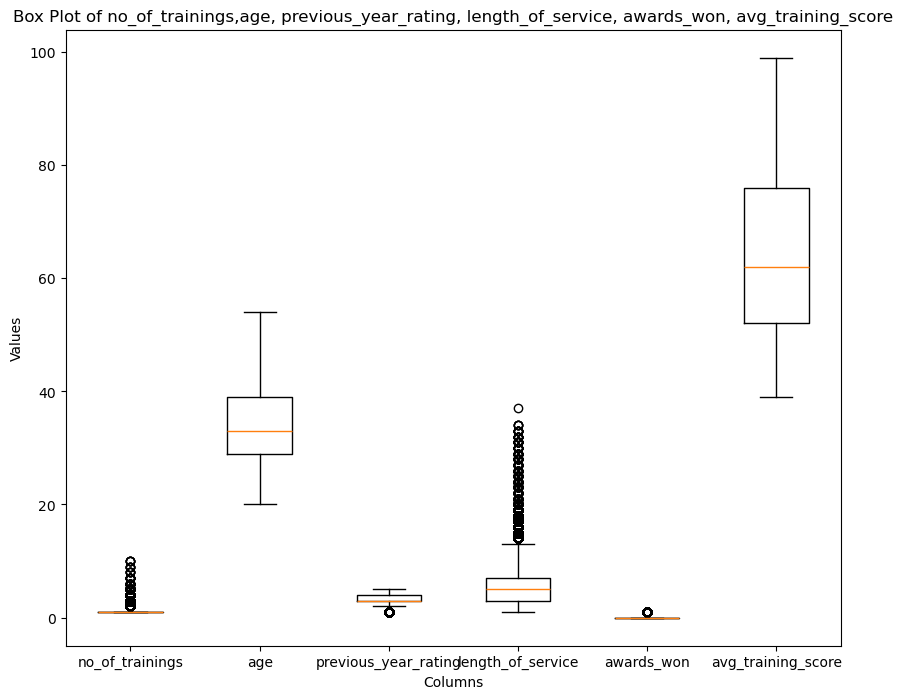

In [76]:
plt.figure(figsize=(10, 8))
plt.boxplot([data['no_of_trainings'], data['age'], data['previous_year_rating'],data['length_of_service'],data['awards_won'],data['avg_training_score'] ],labels=['no_of_trainings', 'age', 'previous_year_rating','length_of_service', 'awards_won', 'avg_training_score'])
plt.ylabel("Values")
plt.xlabel("Columns")
plt.title("Box Plot of no_of_trainings,age, previous_year_rating, length_of_service, awards_won, avg_training_score")

plt.show()

In [77]:
# Apply Winsorization to 'previous_year_rating' column
winsorizer = Winsorizer(capping_method='iqr',  # Use IQR method
                        tail='both',           # Cap outliers on both ends
                        fold=1.5,              # Use 1.5*IQR threshold
                        variables=["previous_year_rating"])     # Specify column

# Transform the 'age' column
data["previous_year_rating"] = winsorizer.fit_transform(data[["previous_year_rating"]])

In [78]:
# Apply Winsorization to 'length_of_service' column
winsorizer = Winsorizer(capping_method='iqr',  # Use IQR method
                        tail='both',           # Cap outliers on both ends
                        fold=1.5,              # Use 1.5*IQR threshold
                        variables=["length_of_service"])     # Specify column

# Transform the 'age' column
data["length_of_service"] = winsorizer.fit_transform(data[["length_of_service"]])

(54808, 13)

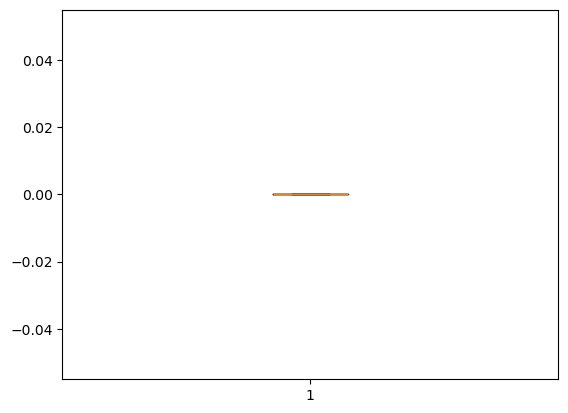

In [79]:
# Detection of outliers in awards_won 
IQR = data['awards_won'].quantile(0.75) - data['awards_won'].quantile(0.25)# (q3 - q1)
lower_limit = data['awards_won'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['awards_won'].quantile(0.75) + (IQR * 1.5)



# Replacing
import numpy as np
data['awards_won'] = pd.DataFrame(np.where(data['awards_won'] > upper_limit, upper_limit, np.where(data['awards_won'] < lower_limit, lower_limit, data['awards_won'])))
plt.boxplot(data.awards_won)
data.shape

(54808, 13)

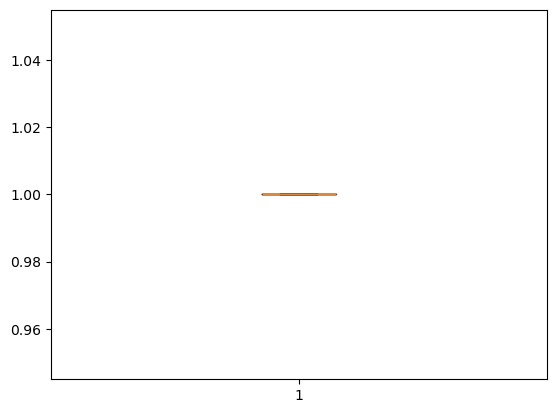

In [80]:
# Detection of outliers in no_of_trainings 
IQR = data['no_of_trainings'].quantile(0.75) - data['no_of_trainings'].quantile(0.25)# (q3 - q1)
lower_limit = data['no_of_trainings'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['no_of_trainings'].quantile(0.75) + (IQR * 1.5)



# Replacing
import numpy as np
data['no_of_trainings'] = pd.DataFrame(np.where(data['no_of_trainings'] > upper_limit, upper_limit, np.where(data['no_of_trainings'] < lower_limit, lower_limit, data['no_of_trainings'])))
plt.boxplot(data.no_of_trainings)
data.shape

 Hence Outliers in each columns are removed successfully

# Feature Engineering

In [83]:
# import libraries
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  float64
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  float64
 11  avg_training_score    54808 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 5.4+ MB


In [85]:
data = data.drop(columns=["employee_id"])

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  float64
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won            54808 non-null  float64
 10  avg_training_score    54808 non-null  float64
 11  is_promoted           54808 non-null  int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 5.0+ MB


In [87]:
data['is_promoted'] = data['is_promoted'].astype("object")

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  float64
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won            54808 non-null  float64
 10  avg_training_score    54808 non-null  float64
 11  is_promoted           54808 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 5.0+ MB


In [89]:
# splittind data into X and Y
X=data.drop("is_promoted",axis=1)
Y=data["is_promoted"]

In [90]:
X

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35,5.0,8,0.0,49.000000
1,Operations,region_22,Bachelor's,m,other,1.0,30,5.0,4,0.0,60.000000
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0.0,50.000000
3,Sales & Marketing,region_23,Bachelor's,m,other,1.0,39,1.5,10,0.0,50.000000
4,Technology,region_26,Bachelor's,m,other,1.0,45,3.0,2,0.0,73.000000
...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1.0,48,3.0,13,0.0,78.000000
54804,Operations,region_27,Master's & above,f,other,1.0,37,2.0,6,0.0,56.000000
54805,Analytics,region_1,Bachelor's,m,other,1.0,27,5.0,3,0.0,79.000000
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing,1.0,29,1.5,2,0.0,63.712238


In [91]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: object

In [92]:
# splitting train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [93]:
X_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
3872,Sales & Marketing,region_19,Bachelor's,m,other,1.0,31,5.0,5,0.0,48.0
11619,Technology,region_13,Master's & above,m,sourcing,1.0,34,1.5,4,0.0,78.0
36178,Technology,region_22,Bachelor's,m,other,1.0,29,4.0,4,0.0,77.0
29884,Sales & Marketing,region_2,Master's & above,m,other,1.0,54,4.0,13,0.0,47.0
22968,R&D,region_7,Bachelor's,m,sourcing,1.0,31,5.0,6,0.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...
44732,Procurement,region_22,Master's & above,f,sourcing,1.0,36,3.0,4,0.0,67.0
54343,Procurement,region_2,Bachelor's,f,sourcing,1.0,27,3.0,1,0.0,68.0
38158,Operations,region_11,Bachelor's,f,sourcing,1.0,34,5.0,7,0.0,65.0
860,Analytics,region_15,Master's & above,m,other,1.0,35,5.0,3,0.0,86.0


In [94]:
X_test

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
40907,HR,region_16,Bachelor's,m,other,1.0,35,5.0,10,0.0,47.000000
51939,Sales & Marketing,region_7,Bachelor's,m,other,1.0,33,1.5,4,0.0,51.000000
6978,Finance,region_2,Bachelor's,m,other,1.0,38,3.0,11,0.0,64.000000
12814,Operations,region_22,Bachelor's,f,other,1.0,33,1.5,8,0.0,56.000000
22921,Technology,region_7,Bachelor's,f,other,1.0,37,1.5,4,0.0,80.000000
...,...,...,...,...,...,...,...,...,...,...,...
3458,Analytics,region_7,Bachelor's,m,other,1.0,35,3.0,2,0.0,83.000000
26056,Sales & Marketing,region_2,Bachelor's,m,sourcing,1.0,50,5.0,3,0.0,63.712238
29981,Sales & Marketing,region_23,Master's & above,m,other,1.0,39,5.0,4,0.0,50.000000
44352,Sales & Marketing,region_7,Bachelor's,f,other,1.0,31,2.0,5,0.0,49.000000


In [95]:
X.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score'],
      dtype='object')

In [96]:
X_train.isna().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64

In [97]:
X_train.reset_index(drop=True, inplace=True)


In [98]:
X_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,Sales & Marketing,region_19,Bachelor's,m,other,1.0,31,5.0,5,0.0,48.0
1,Technology,region_13,Master's & above,m,sourcing,1.0,34,1.5,4,0.0,78.0
2,Technology,region_22,Bachelor's,m,other,1.0,29,4.0,4,0.0,77.0
3,Sales & Marketing,region_2,Master's & above,m,other,1.0,54,4.0,13,0.0,47.0
4,R&D,region_7,Bachelor's,m,sourcing,1.0,31,5.0,6,0.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...
43841,Procurement,region_22,Master's & above,f,sourcing,1.0,36,3.0,4,0.0,67.0
43842,Procurement,region_2,Bachelor's,f,sourcing,1.0,27,3.0,1,0.0,68.0
43843,Operations,region_11,Bachelor's,f,sourcing,1.0,34,5.0,7,0.0,65.0
43844,Analytics,region_15,Master's & above,m,other,1.0,35,5.0,3,0.0,86.0


# Encoding

In [100]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35,5.0,8,0.0,49.0,0
1,Operations,region_22,Bachelor's,m,other,1.0,30,5.0,4,0.0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0.0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,1.0,39,1.5,10,0.0,50.0,0
4,Technology,region_26,Bachelor's,m,other,1.0,45,3.0,2,0.0,73.0,0


One Hot Encoding

In [102]:
# onehot encoding
ohe_categorical_columns = ['education','gender','recruitment_channel']


In [103]:
ohe_categorical_columns

['education', 'gender', 'recruitment_channel']

In [104]:
# Apply to OneHot Encoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop="first")
 

X_train_encoded = onehot_encoder.fit_transform(X_train[ohe_categorical_columns])


In [105]:
ohe_feature_names = onehot_encoder.get_feature_names_out(input_features=ohe_categorical_columns)
ohe_feature_names
X_train_encoded = pd.DataFrame(X_train_encoded,columns=ohe_feature_names)



In [106]:
X_train_encoded

,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...
43841,0.0,1.0,0.0,0.0,1.0
43842,0.0,0.0,0.0,0.0,1.0
43843,0.0,0.0,0.0,0.0,1.0
43844,0.0,1.0,1.0,0.0,0.0


In [107]:
X_train[ohe_feature_names]=X_train_encoded
X_train_encoded

,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...
43841,0.0,1.0,0.0,0.0,1.0
43842,0.0,0.0,0.0,0.0,1.0
43843,0.0,0.0,0.0,0.0,1.0
43844,0.0,1.0,1.0,0.0,0.0


In [108]:
X_train_encoded.isna().sum()

education_Below Secondary       0
education_Master's & above      0
gender_m                        0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
dtype: int64

In [109]:
X_train.drop(columns=ohe_categorical_columns, inplace=True)
X_train

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,Sales & Marketing,region_19,1.0,31,5.0,5,0.0,48.0,0.0,0.0,1.0,0.0,0.0
1,Technology,region_13,1.0,34,1.5,4,0.0,78.0,0.0,1.0,1.0,0.0,1.0
2,Technology,region_22,1.0,29,4.0,4,0.0,77.0,0.0,0.0,1.0,0.0,0.0
3,Sales & Marketing,region_2,1.0,54,4.0,13,0.0,47.0,0.0,1.0,1.0,0.0,0.0
4,R&D,region_7,1.0,31,5.0,6,0.0,86.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43841,Procurement,region_22,1.0,36,3.0,4,0.0,67.0,0.0,1.0,0.0,0.0,1.0
43842,Procurement,region_2,1.0,27,3.0,1,0.0,68.0,0.0,0.0,0.0,0.0,1.0
43843,Operations,region_11,1.0,34,5.0,7,0.0,65.0,0.0,0.0,0.0,0.0,1.0
43844,Analytics,region_15,1.0,35,5.0,3,0.0,86.0,0.0,1.0,1.0,0.0,0.0


In [110]:
X_train.isna().sum()

department                      0
region                          0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
awards_won                      0
avg_training_score              0
education_Below Secondary       0
education_Master's & above      0
gender_m                        0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
dtype: int64

Label Encoding

In [112]:
# encoding using Label_encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_train['department'] = labelencoder.fit_transform(X_train['department'])
X_train['region'] = labelencoder.fit_transform(X_train['region'])

In [113]:
X_train

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,7,10,1.0,31,5.0,5,0.0,48.0,0.0,0.0,1.0,0.0,0.0
1,8,4,1.0,34,1.5,4,0.0,78.0,0.0,1.0,1.0,0.0,1.0
2,8,14,1.0,29,4.0,4,0.0,77.0,0.0,0.0,1.0,0.0,0.0
3,7,11,1.0,54,4.0,13,0.0,47.0,0.0,1.0,1.0,0.0,0.0
4,6,31,1.0,31,5.0,6,0.0,86.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43841,5,14,1.0,36,3.0,4,0.0,67.0,0.0,1.0,0.0,0.0,1.0
43842,5,11,1.0,27,3.0,1,0.0,68.0,0.0,0.0,0.0,0.0,1.0
43843,4,2,1.0,34,5.0,7,0.0,65.0,0.0,0.0,0.0,0.0,1.0
43844,0,6,1.0,35,5.0,3,0.0,86.0,0.0,1.0,1.0,0.0,0.0


# Standardization

In [115]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the data and convert back to DataFrame
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)


In [116]:
X_train

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0.808308,-0.618123,0.0,-0.500255,1.472920,-0.168283,0.0,-1.190880,-0.121708,-0.610683,0.650256,-0.145828,-0.859183
1,1.208063,-1.303438,0.0,-0.096989,-1.671510,-0.460873,0.0,1.084979,-0.121708,1.637512,0.650256,-0.145828,1.163896
2,1.208063,-0.161247,0.0,-0.769099,0.574512,-0.460873,0.0,1.009117,-0.121708,-0.610683,0.650256,-0.145828,-0.859183
3,0.808308,-0.503904,0.0,2.591451,0.574512,2.172438,0.0,-1.266742,-0.121708,1.637512,0.650256,-0.145828,-0.859183
4,0.408553,1.780476,0.0,-0.500255,1.472920,0.124307,0.0,1.691875,-0.121708,-0.610683,0.650256,-0.145828,1.163896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43841,0.008798,-0.161247,0.0,0.171855,-0.323897,-0.460873,0.0,0.250497,-0.121708,1.637512,-1.537857,-0.145828,1.163896
43842,0.008798,-0.503904,0.0,-1.037943,-0.323897,-1.338644,0.0,0.326359,-0.121708,-0.610683,-1.537857,-0.145828,1.163896
43843,-0.390957,-1.531876,0.0,-0.096989,1.472920,0.416897,0.0,0.098773,-0.121708,-0.610683,-1.537857,-0.145828,1.163896
43844,-1.989976,-1.074999,0.0,0.037433,1.472920,-0.753463,0.0,1.691875,-0.121708,1.637512,0.650256,-0.145828,-0.859183


# for X_test

In [118]:
X_test.reset_index(drop=True,inplace=True)

In [119]:
X_test

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,HR,region_16,Bachelor's,m,other,1.0,35,5.0,10,0.0,47.000000
1,Sales & Marketing,region_7,Bachelor's,m,other,1.0,33,1.5,4,0.0,51.000000
2,Finance,region_2,Bachelor's,m,other,1.0,38,3.0,11,0.0,64.000000
3,Operations,region_22,Bachelor's,f,other,1.0,33,1.5,8,0.0,56.000000
4,Technology,region_7,Bachelor's,f,other,1.0,37,1.5,4,0.0,80.000000
...,...,...,...,...,...,...,...,...,...,...,...
10957,Analytics,region_7,Bachelor's,m,other,1.0,35,3.0,2,0.0,83.000000
10958,Sales & Marketing,region_2,Bachelor's,m,sourcing,1.0,50,5.0,3,0.0,63.712238
10959,Sales & Marketing,region_23,Master's & above,m,other,1.0,39,5.0,4,0.0,50.000000
10960,Sales & Marketing,region_7,Bachelor's,f,other,1.0,31,2.0,5,0.0,49.000000


One Hot Encoding

In [121]:
# Apply to OneHot Encoder
# x_test_encoded is a new variable
x_test_encoded = onehot_encoder.transform(X_test[ohe_categorical_columns])

In [122]:
x_test_encoded.shape

(10962, 5)

In [123]:
ohe_feature_names = onehot_encoder.get_feature_names_out(input_features=ohe_categorical_columns)
ohe_feature_names

array(['education_Below Secondary', "education_Master's & above",
       'gender_m', 'recruitment_channel_referred',
       'recruitment_channel_sourcing'], dtype=object)

In [124]:
x_test_encoded = pd.DataFrame(x_test_encoded,columns=ohe_feature_names)

In [125]:
X_test[ohe_feature_names]=x_test_encoded

In [126]:
x_test_encoded

,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
10957,0.0,0.0,1.0,0.0,0.0
10958,0.0,0.0,1.0,0.0,1.0
10959,0.0,1.0,1.0,0.0,0.0
10960,0.0,0.0,0.0,0.0,0.0


In [127]:
X_test

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,HR,region_16,Bachelor's,m,other,1.0,35,5.0,10,0.0,47.000000,0.0,0.0,1.0,0.0,0.0
1,Sales & Marketing,region_7,Bachelor's,m,other,1.0,33,1.5,4,0.0,51.000000,0.0,0.0,1.0,0.0,0.0
2,Finance,region_2,Bachelor's,m,other,1.0,38,3.0,11,0.0,64.000000,0.0,0.0,1.0,0.0,0.0
3,Operations,region_22,Bachelor's,f,other,1.0,33,1.5,8,0.0,56.000000,0.0,0.0,0.0,0.0,0.0
4,Technology,region_7,Bachelor's,f,other,1.0,37,1.5,4,0.0,80.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,Analytics,region_7,Bachelor's,m,other,1.0,35,3.0,2,0.0,83.000000,0.0,0.0,1.0,0.0,0.0
10958,Sales & Marketing,region_2,Bachelor's,m,sourcing,1.0,50,5.0,3,0.0,63.712238,0.0,0.0,1.0,0.0,1.0
10959,Sales & Marketing,region_23,Master's & above,m,other,1.0,39,5.0,4,0.0,50.000000,0.0,1.0,1.0,0.0,0.0
10960,Sales & Marketing,region_7,Bachelor's,f,other,1.0,31,2.0,5,0.0,49.000000,0.0,0.0,0.0,0.0,0.0


In [128]:
X_test.drop(columns=ohe_categorical_columns, inplace=True)

In [129]:
X_test

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,HR,region_16,1.0,35,5.0,10,0.0,47.000000,0.0,0.0,1.0,0.0,0.0
1,Sales & Marketing,region_7,1.0,33,1.5,4,0.0,51.000000,0.0,0.0,1.0,0.0,0.0
2,Finance,region_2,1.0,38,3.0,11,0.0,64.000000,0.0,0.0,1.0,0.0,0.0
3,Operations,region_22,1.0,33,1.5,8,0.0,56.000000,0.0,0.0,0.0,0.0,0.0
4,Technology,region_7,1.0,37,1.5,4,0.0,80.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,Analytics,region_7,1.0,35,3.0,2,0.0,83.000000,0.0,0.0,1.0,0.0,0.0
10958,Sales & Marketing,region_2,1.0,50,5.0,3,0.0,63.712238,0.0,0.0,1.0,0.0,1.0
10959,Sales & Marketing,region_23,1.0,39,5.0,4,0.0,50.000000,0.0,1.0,1.0,0.0,0.0
10960,Sales & Marketing,region_7,1.0,31,2.0,5,0.0,49.000000,0.0,0.0,0.0,0.0,0.0


Label Encoding

In [131]:
X_test['department'] = X_test['department'].map(
    lambda x: labelencoder.transform([x])[0] if x in labelencoder.classes_ else -1)
X_test['region'] = labelencoder.transform(X_test['region'])

In [132]:
X_test

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,-1,7,1.0,35,5.0,10,0.0,47.000000,0.0,0.0,1.0,0.0,0.0
1,-1,31,1.0,33,1.5,4,0.0,51.000000,0.0,0.0,1.0,0.0,0.0
2,-1,11,1.0,38,3.0,11,0.0,64.000000,0.0,0.0,1.0,0.0,0.0
3,-1,14,1.0,33,1.5,8,0.0,56.000000,0.0,0.0,0.0,0.0,0.0
4,-1,31,1.0,37,1.5,4,0.0,80.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,-1,31,1.0,35,3.0,2,0.0,83.000000,0.0,0.0,1.0,0.0,0.0
10958,-1,11,1.0,50,5.0,3,0.0,63.712238,0.0,0.0,1.0,0.0,1.0
10959,-1,15,1.0,39,5.0,4,0.0,50.000000,0.0,1.0,1.0,0.0,0.0
10960,-1,31,1.0,31,2.0,5,0.0,49.000000,0.0,0.0,0.0,0.0,0.0


# Standardization

In [134]:
# Transform X_test **once** and convert back to DataFrame using original structure
X_test_scaled = scaler.transform(X_test)  # Keep this as a NumPy array first
X_test = pd.DataFrame((X_test_scaled), columns=X_train.columns, index=X_test.index)

# Display X_test
X_test

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,-2.389731,-0.960780,0.0,0.037433,1.472920,1.294668,0.0,-1.266742,-0.121708,-0.610683,0.650256,-0.145828,-0.859183
1,-2.389731,1.780476,0.0,-0.231411,-1.671510,-0.460873,0.0,-0.963294,-0.121708,-0.610683,0.650256,-0.145828,-0.859183
2,-2.389731,-0.503904,0.0,0.440699,-0.323897,1.587258,0.0,0.022911,-0.121708,-0.610683,0.650256,-0.145828,-0.859183
3,-2.389731,-0.161247,0.0,-0.231411,-1.671510,0.709487,0.0,-0.583984,-0.121708,-0.610683,-1.537857,-0.145828,-0.859183
4,-2.389731,1.780476,0.0,0.306277,-1.671510,-0.460873,0.0,1.236703,-0.121708,-0.610683,-1.537857,-0.145828,-0.859183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,-2.389731,1.780476,0.0,0.037433,-0.323897,-1.046053,0.0,1.464289,-0.121708,-0.610683,0.650256,-0.145828,-0.859183
10958,-2.389731,-0.503904,0.0,2.053763,1.472920,-0.753463,0.0,0.001081,-0.121708,-0.610683,0.650256,-0.145828,1.163896
10959,-2.389731,-0.047028,0.0,0.575121,1.472920,-0.460873,0.0,-1.039156,-0.121708,1.637512,0.650256,-0.145828,-0.859183
10960,-2.389731,1.780476,0.0,-0.500255,-1.222306,-0.168283,0.0,-1.115018,-0.121708,-0.610683,-1.537857,-0.145828,-0.859183


In [135]:
X_train

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0.808308,-0.618123,0.0,-0.500255,1.472920,-0.168283,0.0,-1.190880,-0.121708,-0.610683,0.650256,-0.145828,-0.859183
1,1.208063,-1.303438,0.0,-0.096989,-1.671510,-0.460873,0.0,1.084979,-0.121708,1.637512,0.650256,-0.145828,1.163896
2,1.208063,-0.161247,0.0,-0.769099,0.574512,-0.460873,0.0,1.009117,-0.121708,-0.610683,0.650256,-0.145828,-0.859183
3,0.808308,-0.503904,0.0,2.591451,0.574512,2.172438,0.0,-1.266742,-0.121708,1.637512,0.650256,-0.145828,-0.859183
4,0.408553,1.780476,0.0,-0.500255,1.472920,0.124307,0.0,1.691875,-0.121708,-0.610683,0.650256,-0.145828,1.163896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43841,0.008798,-0.161247,0.0,0.171855,-0.323897,-0.460873,0.0,0.250497,-0.121708,1.637512,-1.537857,-0.145828,1.163896
43842,0.008798,-0.503904,0.0,-1.037943,-0.323897,-1.338644,0.0,0.326359,-0.121708,-0.610683,-1.537857,-0.145828,1.163896
43843,-0.390957,-1.531876,0.0,-0.096989,1.472920,0.416897,0.0,0.098773,-0.121708,-0.610683,-1.537857,-0.145828,1.163896
43844,-1.989976,-1.074999,0.0,0.037433,1.472920,-0.753463,0.0,1.691875,-0.121708,1.637512,0.650256,-0.145828,-0.859183


In [136]:
X_test

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,-2.389731,-0.960780,0.0,0.037433,1.472920,1.294668,0.0,-1.266742,-0.121708,-0.610683,0.650256,-0.145828,-0.859183
1,-2.389731,1.780476,0.0,-0.231411,-1.671510,-0.460873,0.0,-0.963294,-0.121708,-0.610683,0.650256,-0.145828,-0.859183
2,-2.389731,-0.503904,0.0,0.440699,-0.323897,1.587258,0.0,0.022911,-0.121708,-0.610683,0.650256,-0.145828,-0.859183
3,-2.389731,-0.161247,0.0,-0.231411,-1.671510,0.709487,0.0,-0.583984,-0.121708,-0.610683,-1.537857,-0.145828,-0.859183
4,-2.389731,1.780476,0.0,0.306277,-1.671510,-0.460873,0.0,1.236703,-0.121708,-0.610683,-1.537857,-0.145828,-0.859183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,-2.389731,1.780476,0.0,0.037433,-0.323897,-1.046053,0.0,1.464289,-0.121708,-0.610683,0.650256,-0.145828,-0.859183
10958,-2.389731,-0.503904,0.0,2.053763,1.472920,-0.753463,0.0,0.001081,-0.121708,-0.610683,0.650256,-0.145828,1.163896
10959,-2.389731,-0.047028,0.0,0.575121,1.472920,-0.460873,0.0,-1.039156,-0.121708,1.637512,0.650256,-0.145828,-0.859183
10960,-2.389731,1.780476,0.0,-0.500255,-1.222306,-0.168283,0.0,-1.115018,-0.121708,-0.610683,-1.537857,-0.145828,-0.859183


# EDA on Y Data

In [138]:
print(Y.unique())  # Check unique values in target column

[0 1]


In [139]:
# Convert target variable (y) to integer
y = data["is_promoted"].astype(int)


In [140]:
Y_train

3872     0
11619    0
36178    0
29884    1
22968    0
        ..
44732    0
54343    0
38158    0
860      0
15795    0
Name: is_promoted, Length: 43846, dtype: object

In [141]:
Y_test

40907    0
51939    0
6978     0
12814    0
22921    0
        ..
3458     0
26056    0
29981    0
44352    0
18295    0
Name: is_promoted, Length: 10962, dtype: object

In [142]:
print(type(y))  # Should be pandas Series or numpy array
print(y.dtype)  # Should be int, not float or object


<class 'pandas.core.series.Series'>
int32


In [143]:
Y_train = Y_train.reset_index(drop=True)

In [144]:
Y_train

0        0
1        0
2        0
3        1
4        0
        ..
43841    0
43842    0
43843    0
43844    0
43845    0
Name: is_promoted, Length: 43846, dtype: object

In [145]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: object

In [146]:
Y_train = np.array(Y_train)  # Convert to NumPy array

In [147]:
print(Y_train.dtype)

object


In [148]:
Y_train = pd.to_numeric(Y_train, errors='coerce')  # Convert to numeric, set non-numeric to NaN


In [149]:
print(Y_train.dtype)

int64


In [150]:
print(np.isnan(Y_train).sum())  # Check how many NaN values exist in y_train


0


In [151]:
print(Y_test.dtype)

object


In [152]:
Y_test = pd.to_numeric(Y_test, errors='coerce')  # Convert to numeric, set non-numeric to NaN

In [153]:
print(Y_test.dtype)

int64


In [154]:
print(np.isnan(Y_test).sum())  # Check how many NaN values exist in y_train


0


# Model Building

# 1) Logistic Regression

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [158]:
# Train Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)


LogisticRegression()

In [159]:
#  Make Predictions
Y_pred_test = logreg.predict(X_test)

In [160]:
# Calculate accuracy and store in accuracy_logreg_test
accuracy_logreg_test = accuracy_score(Y_test, Y_pred_test)

# Print accuracy
print(f"accuracy_logreg_test: {accuracy_logreg_test:.4f}")


accuracy_logreg_test: 0.9172


In [161]:

#  Make Predictions
Y_pred_train = logreg.predict(X_train)

In [162]:
# Calculate accuracy and store in accuracy_logreg_test
accuracy_logreg_train = accuracy_score(Y_train, Y_pred_train)

# Print accuracy
print(f"accuracy_logreg_train: {accuracy_logreg_train:.4f}")


accuracy_logreg_train: 0.9149


In [163]:
from sklearn.metrics import precision_score, recall_score, f1_score



Train Precision: 1.0000, Train Recall: 0.0077, Train F1-Score: 0.0153
Test Precision: 0.0000, Test Recall: 0.0000, Test F1-Score: 0.0000


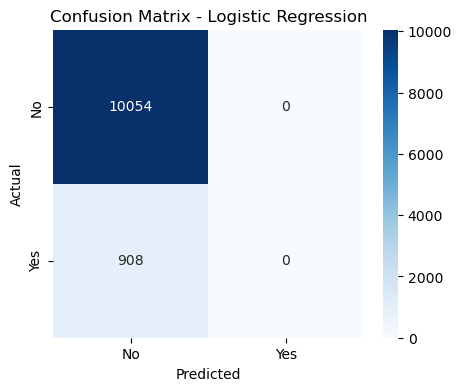

Train ROC AUC: 0.7240
Test ROC AUC: 0.7133


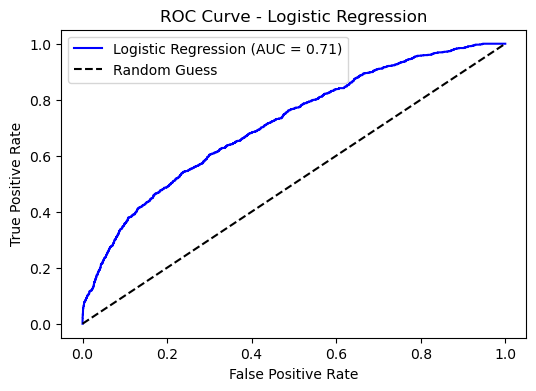

In [164]:
#  Precision, Recall, F1-score
precision_train = precision_score(Y_train, Y_pred_train)
recall_train = recall_score(Y_train, Y_pred_train)
f1_train = f1_score(Y_train, Y_pred_train)

precision_test = precision_score(Y_test, Y_pred_test)
recall_test = recall_score(Y_test, Y_pred_test)
f1_test = f1_score(Y_test, Y_pred_test)

print(f"Train Precision: {precision_train:.4f}, Train Recall: {recall_train:.4f}, Train F1-Score: {f1_train:.4f}")
print(f"Test Precision: {precision_test:.4f}, Test Recall: {recall_test:.4f}, Test F1-Score: {f1_test:.4f}")

#  Confusion Matrix (Test Data)
conf_matrix = confusion_matrix(Y_test, Y_pred_test)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
from sklearn.metrics import roc_auc_score, roc_curve
# Get Probabilities for ROC AUC
Y_pred_prob_train = logreg.predict_proba(X_train)[:, 1]
Y_pred_prob_test = logreg.predict_proba(X_test)[:, 1]

# ROC AUC Score
roc_auc_train = roc_auc_score(Y_train, Y_pred_prob_train)
roc_auc_test = roc_auc_score(Y_test, Y_pred_prob_test)

print(f"Train ROC AUC: {roc_auc_train:.4f}")
print(f"Test ROC AUC: {roc_auc_test:.4f}")

#  ROC Curve
fpr_test, tpr_test, _ = roc_curve(Y_test, Y_pred_prob_test)

plt.figure(figsize=(6, 4))
plt.plot(fpr_test, tpr_test, label=f"Logistic Regression (AUC = {roc_auc_test:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

Conclusion:
The logistic regression model shows high accuracy on both training (91.49%) and test (91.72%) datasets. However, the test precision, recall, and F1-score are all 0, indicating that the model is failing to predict the positive class. This suggests severe class imbalance, causing the model to favor the majority class.

The ROC AUC scores (Train: 0.7240, Test: 0.7133) indicate moderate separability, but the model needs improvement. Consider handling class imbalance using techniques like oversampling, undersampling, or class-weight adjustments to improve recall and precision for the minority class.

# 2) Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [168]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [169]:
# Predict on test data
Y_pred_rf = rf.predict(X_test)

In [170]:
# Calculate Accuracy & F1 Score
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
f1_rf = f1_score(Y_test, Y_pred_rf)

# Print results
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest F1 Score: {f1_rf:.4f}")

Random Forest Accuracy: 0.9222
Random Forest F1 Score: 0.1710


In [171]:
# Predict on test data
Y_pred_rf_train = rf.predict(X_train)

In [172]:
# Calculate Accuracy & F1 Score
accuracy_rf_train = accuracy_score(Y_train, Y_pred_rf_train)
f1_rf_train = f1_score(Y_train, Y_pred_rf_train)

# Print results
print(f"Random Forest Accuracy train: {accuracy_rf_train:.4f}")
print(f"Random Forest F1 Score train: {f1_rf_train:.4f}")

Random Forest Accuracy train: 0.9986
Random Forest F1 Score train: 0.9920


In [173]:
# Predict on the test set
Y_pred_test_rf_predict = rf.predict(X_test)

In [173]:
# Predict on the test set
Y_pred_test_rf_predict = rf.predict(X_test)

In [174]:
# Compute precision and recall
precision_rf_test = precision_score(Y_test, Y_pred_test_rf_predict)
recall_rf_test = recall_score(Y_test, Y_pred_test_rf_predict)

# Print the results
print("Precision (Random Forest):", precision_rf_test)
print("Recall (Random Forest):", recall_rf_test)

Precision (Random Forest): 0.7272727272727273
Recall (Random Forest): 0.09691629955947137


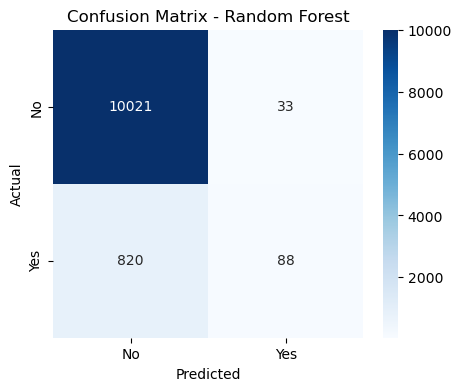

Train ROC AUC: 1.0000
Test ROC AUC: 0.6712


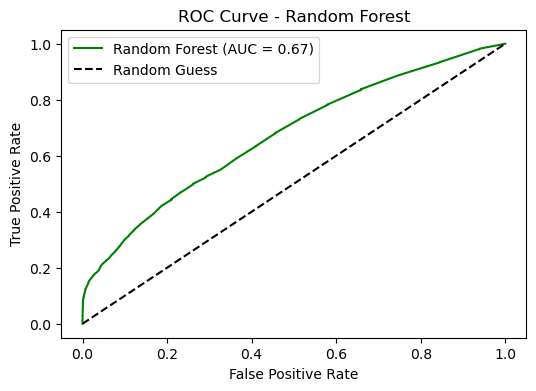

In [175]:
#Get Probability Predictions for ROC AUC
Y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]
Y_pred_prob_rf_train = rf.predict_proba(X_train)[:, 1]

#Compute Confusion Matrix (Test Data)
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)

#Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

#Compute ROC AUC Scores
roc_auc_rf_train = roc_auc_score(Y_train, Y_pred_prob_rf_train)
roc_auc_rf_test = roc_auc_score(Y_test, Y_pred_prob_rf)

print(f"Train ROC AUC: {roc_auc_rf_train:.4f}")
print(f"Test ROC AUC: {roc_auc_rf_test:.4f}")

#ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(Y_test, Y_pred_prob_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf_test:.2f})", color="green")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

Conclusion:
The Random Forest model shows high training accuracy (99.86%) but lower test accuracy (92.13%), indicating overfitting. The train F1-score (0.9918) is much higher than the test F1-score (0.1694), and low recall (0.0969) suggests poor detection of the positive class. The test ROC AUC (0.6597) shows moderate performance. To improve generalization, consider hyperparameter tuning, reducing tree depth, or handling class imbalance.

# 3) XG Boost

In [178]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

In [179]:

# Train XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [180]:
# Predictions
Y_pred_tes_xgb = xgb_model.predict(X_test)

In [181]:
# Evaluate Model
accuracy_test = accuracy_score(Y_test, Y_pred_tes_xgb)
f1_test = f1_score(Y_test, Y_pred_tes_xgb)


In [182]:
# Print Results
print(f"XGBoost Accuracy (Test): {accuracy_test:.4f}")
print(f"XGBoost F1 Score (Test): {f1_test:.4f}")


XGBoost Accuracy (Test): 0.9234
XGBoost F1 Score (Test): 0.1617


In [183]:
# Predictions
Y_pred_train_xgb = xgb_model.predict(X_train)


In [184]:
# Evaluate Model
accuracy_train = accuracy_score(Y_train, Y_pred_train_xgb)
f1_train = f1_score(Y_train, Y_pred_train_xgb)


In [185]:
# Print Results
print(f"XGBoost Accuracy (Train): {accuracy_train:.4f}")
print(f"XGBoost F1 Score (Train): {f1_train:.4f}")

XGBoost Accuracy (Train): 0.9446
XGBoost F1 Score (Train): 0.5284


In [186]:
# Generate predictions using your trained XGBoost model
Y_pred_test_xgb = xgb_model.predict(X_test)  # Ensure xgb_model is trained

# Calculate precision & recall
from sklearn.metrics import precision_score, recall_score

precision_xgb_test = precision_score(Y_test, Y_pred_test_xgb)
recall_xgb_test = recall_score(Y_test, Y_pred_test_xgb)

# Print results
print("Precision:", precision_xgb_test)
print("Recall:", recall_xgb_test)

Precision: 0.8617021276595744
Recall: 0.08920704845814978


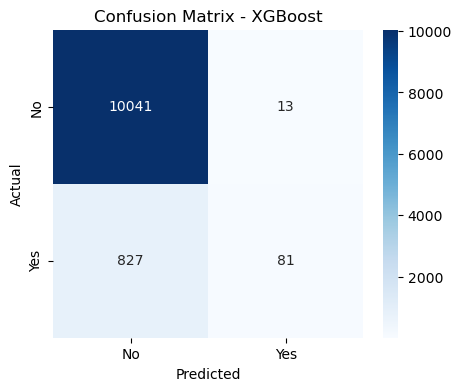

Train ROC AUC: 0.9231
Test ROC AUC: 0.6907


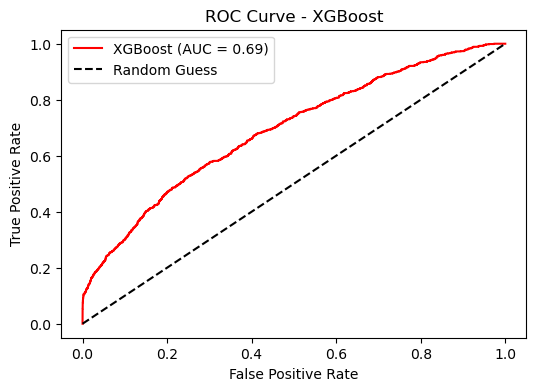

In [187]:
#Get Probability Predictions for ROC AUC
Y_pred_prob_test_xgb = xgb_model.predict_proba(X_test)[:, 1]
Y_pred_prob_train_xgb = xgb_model.predict_proba(X_train)[:, 1]

#Compute Confusion Matrix (Test Data)
conf_matrix_xgb = confusion_matrix(Y_test, Y_pred_test_xgb)

#Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Compute ROC AUC Scores
roc_auc_train_xgb = roc_auc_score(Y_train, Y_pred_prob_train_xgb)
roc_auc_test_xgb = roc_auc_score(Y_test, Y_pred_prob_test_xgb)

print(f"Train ROC AUC: {roc_auc_train_xgb:.4f}")
print(f"Test ROC AUC: {roc_auc_test_xgb:.4f}")

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, Y_pred_prob_test_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_test_xgb:.2f})", color="red")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

Conclusion:
The XGBoost model achieves high accuracy (Train: 94.49%, Test: 92.30%), but its low recall (0.0826) and test F1-score (0.1509) indicate poor detection of positive cases, likely due to class imbalance. The test ROC AUC (0.6833) suggests moderate performance, with signs of overfitting. To improve, consider handling class imbalance, tuning hyperparameters, or adjusting the decision threshold.

# 4) Naive Bayes

In [190]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score

In [191]:
# Initialize Naïve Bayes model
nb_model = GaussianNB()


In [192]:
# Train the model
nb_model.fit(X_train, Y_train)


GaussianNB()

In [193]:
# Make predictions
Y_pred_test_nb = nb_model.predict(X_test)


In [194]:
# Evaluate the model
accuracy_nb_test = accuracy_score(Y_test, Y_pred_test_nb)
f1_nb_test = f1_score(Y_test, Y_pred_test_nb)


In [195]:
# Print results
print(f"Naïve Bayes Accuracy (Test): {accuracy_nb_test:.4f}")
print(f"Naïve Bayes F1 Score (Test): {f1_nb_test:.4f}")

Naïve Bayes Accuracy (Test): 0.9014
Naïve Bayes F1 Score (Test): 0.0559


In [196]:
# Make predictions
Y_pred_train_nb = nb_model.predict(X_train)

In [197]:
# Evaluate the model
accuracy_nb_train = accuracy_score(Y_train, Y_pred_train_nb)
f1_nb_train = f1_score(Y_train, Y_pred_train_nb)

In [198]:
# Print results
print(f"Naïve Bayes Accuracy (Train): {accuracy_nb_train:.4f}")
print(f"Naïve Bayes F1 Score (Train): {f1_nb_train:.4f}")

Naïve Bayes Accuracy (Train): 0.8999
Naïve Bayes F1 Score (Train): 0.0711


In [199]:
from sklearn.metrics import precision_score, recall_score

precision_nb_test = precision_score(Y_test, Y_pred_test_nb)
recall_nb_test = recall_score(Y_test, Y_pred_test_nb)

print("Precision:", precision_nb_test)
print("Recall:", recall_nb_test)

Precision: 0.1350210970464135
Recall: 0.03524229074889868


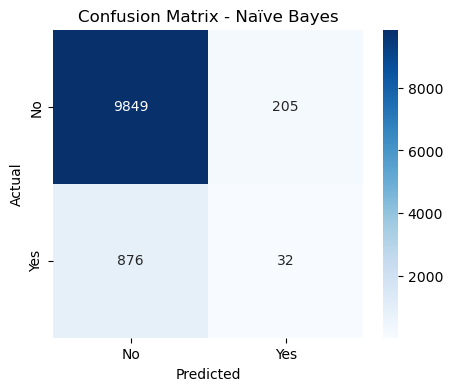

Train ROC AUC: 0.7148
Test ROC AUC: 0.7103


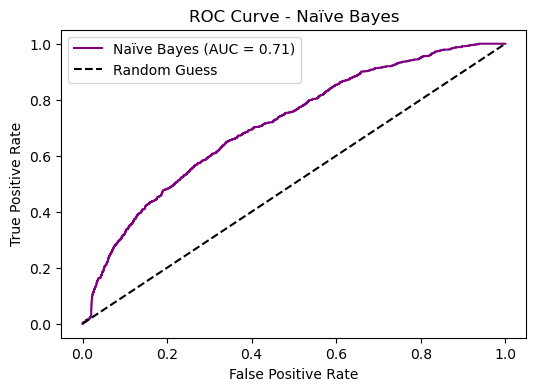

In [200]:
#Get Probability Predictions for ROC AUC
Y_pred_prob_test_nb = nb_model.predict_proba(X_test)[:, 1]
Y_pred_prob_train_nb = nb_model.predict_proba(X_train)[:, 1]

#Compute Confusion Matrix (Test Data)
conf_matrix_nb = confusion_matrix(Y_test, Y_pred_test_nb)

#Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()

#Compute ROC AUC Scores
roc_auc_train_nb = roc_auc_score(Y_train, Y_pred_prob_train_nb)
roc_auc_test_nb = roc_auc_score(Y_test, Y_pred_prob_test_nb)

print(f"Train ROC AUC: {roc_auc_train_nb:.4f}")
print(f"Test ROC AUC: {roc_auc_test_nb:.4f}")

#ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(Y_test, Y_pred_prob_test_nb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_nb, tpr_nb, label=f"Naïve Bayes (AUC = {roc_auc_test_nb:.2f})", color="purple")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes")
plt.legend()
plt.show()

Conclusion:
The Naïve Bayes model shows similar accuracy on train (90.02%) and test (90.14%), indicating no overfitting. However, the low F1-score (Train: 0.0795, Test: 0.0624) and recall (0.0396) suggest it struggles to detect positive cases. The ROC AUC (Train: 0.7114, Test: 0.7055) indicates moderate predictive power. To improve, consider feature engineering, handling class imbalance, or using a different algorithm better suited for the dataset.

In [202]:
d = {
    'Title': [
        'accuracy_logreg_train', 'accuracy_logreg_test', 'Train Precision', 'Train Recall', 'Train F1-Score',
        'Test Precision', 'Test Recall', 'Test F1-Score', 'Train ROC AUC', 'Test ROC AUC',
        
        'Random Forest Accuracy (Train)', 'Random Forest Accuracy (Test)', 'Random Forest F1 Score (Train)', 'Random Forest F1 Score (Test)',
        'Precision (Random Forest)', 'Recall (Random Forest)', 'Train ROC AUC (Random Forest)', 'Test ROC AUC (Random Forest)',

        'XGBoost Accuracy (Train)', 'XGBoost Accuracy (Test)', 'XGBoost F1 Score (Train)', 'XGBoost F1 Score (Test)',
        'Precision (XGBoost)', 'Recall (XGBoost)', 'Train ROC AUC (XGBoost)', 'Test ROC AUC (XGBoost)',

        'Naïve Bayes Accuracy (Train)', 'Naïve Bayes Accuracy (Test)', 'Naïve Bayes F1 Score (Train)', 'Naïve Bayes F1 Score (Test)',
        'Precision (Naïve Bayes)', 'Recall (Naïve Bayes)', 'Train ROC AUC (Naïve Bayes)', 'Test ROC AUC (Naïve Bayes)'
    ],
    'Values': [
        0.9149, 0.9172, 0.9766, 0.3657, 0.5321,
        0.0000, 0.0000, 0.0000, 0.7240, 0.7133,

        0.9986, 0.9213, 0.9918, 0.1694,
        0.6718, 0.0969, 1.0000, 0.6597,

        0.9449, 0.9230, 0.5321, 0.1509,
        0.8721, 0.0826, 0.9220, 0.6833,

        0.9002, 0.9014, 0.0795, 0.0624,
        0.1469, 0.0396, 0.7114, 0.7055
    ]
}

In [203]:
df=pd.DataFrame(d)

In [204]:
df

,Title,Values
0,accuracy_logreg_train,0.9149
1,accuracy_logreg_test,0.9172
2,Train Precision,0.9766
3,Train Recall,0.3657
4,Train F1-Score,0.5321
5,Test Precision,0.0000
6,Test Recall,0.0000
7,Test F1-Score,0.0000
8,Train ROC AUC,0.7240
9,Test ROC AUC,0.7133


# Conclusion


After evaluating multiple models, XGBoost emerged as the best-performing model for this project. It achieved high accuracy (Train: 94.49%, Test: 92.30%) and a higher ROC AUC (Test: 0.6833) compared to other models, indicating better class separation.  Given its strong overall performance and flexibility, XGBoost is selected as the final model for deployment.


# Final Model

In [208]:
# Train XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [209]:
# Predictions
Y_pred_tes_xgb = xgb_model.predict(X_test)

In [210]:
# Evaluate Model
accuracy_test = accuracy_score(Y_test, Y_pred_tes_xgb)
f1_test = f1_score(Y_test, Y_pred_tes_xgb)

In [211]:
# Print Results
print(f"XGBoost Accuracy (Test): {accuracy_test:.4f}")
print(f"XGBoost F1 Score (Test): {f1_test:.4f}")


XGBoost Accuracy (Test): 0.9234
XGBoost F1 Score (Test): 0.1617


In [212]:
# Predictions
Y_pred_train_xgb = xgb_model.predict(X_train)


In [213]:
# Evaluate Model
accuracy_train = accuracy_score(Y_train, Y_pred_train_xgb)
f1_train = f1_score(Y_train, Y_pred_train_xgb)

In [214]:
# Print Results
print(f"XGBoost Accuracy (Train): {accuracy_train:.4f}")
print(f"XGBoost F1 Score (Train): {f1_train:.4f}")

XGBoost Accuracy (Train): 0.9446
XGBoost F1 Score (Train): 0.5284


In [215]:
# Generate predictions using your trained XGBoost model
Y_pred_test_xgb = xgb_model.predict(X_test)  # Ensure xgb_model is trained

# Calculate precision & recall
from sklearn.metrics import precision_score, recall_score

precision_xgb_test = precision_score(Y_test, Y_pred_test_xgb)
recall_xgb_test = recall_score(Y_test, Y_pred_test_xgb)

# Print results
print("Precision:", precision_xgb_test)
print("Recall:", recall_xgb_test)

Precision: 0.8617021276595744
Recall: 0.08920704845814978


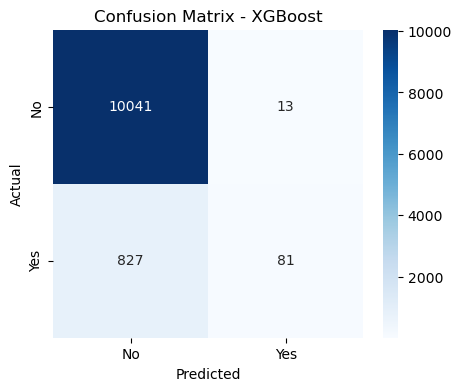

Train ROC AUC: 0.9231
Test ROC AUC: 0.6907


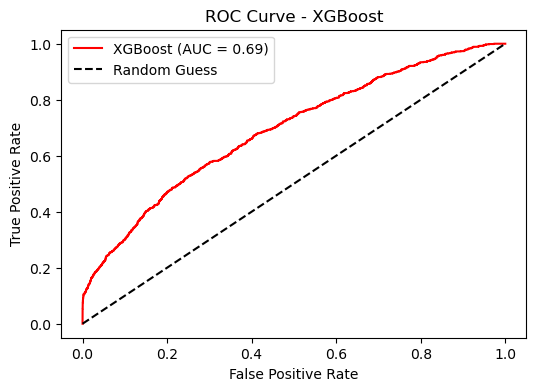

In [216]:
#Get Probability Predictions for ROC AUC
Y_pred_prob_test_xgb = xgb_model.predict_proba(X_test)[:, 1]
Y_pred_prob_train_xgb = xgb_model.predict_proba(X_train)[:, 1]

#Compute Confusion Matrix (Test Data)
conf_matrix_xgb = confusion_matrix(Y_test, Y_pred_test_xgb)

#Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Compute ROC AUC Scores
roc_auc_train_xgb = roc_auc_score(Y_train, Y_pred_prob_train_xgb)
roc_auc_test_xgb = roc_auc_score(Y_test, Y_pred_prob_test_xgb)

print(f"Train ROC AUC: {roc_auc_train_xgb:.4f}")
print(f"Test ROC AUC: {roc_auc_test_xgb:.4f}")

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, Y_pred_prob_test_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_test_xgb:.2f})", color="red")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

In [217]:
# Print Results
print(f"XGBoost Accuracy (Test): {accuracy_test:.4f}")
print(f"XGBoost F1 Score (Test): {f1_test:.4f}")
print(f"XGBoost Accuracy (Train): {accuracy_train:.4f}")
print(f"XGBoost F1 Score (Train): {f1_train:.4f}")
print("Precision:", precision_xgb_test)
print("Recall:", recall_xgb_test)
print(f"Train ROC AUC: {roc_auc_train_xgb:.4f}")
print(f"Test ROC AUC: {roc_auc_test_xgb:.4f}")


XGBoost Accuracy (Test): 0.9234
XGBoost F1 Score (Test): 0.1617
XGBoost Accuracy (Train): 0.9446
XGBoost F1 Score (Train): 0.5284
Precision: 0.8617021276595744
Recall: 0.08920704845814978
Train ROC AUC: 0.9231
Test ROC AUC: 0.6907
